<a href="https://colab.research.google.com/github/anuragtaiskar/Mobile_price_range_predication/blob/main/Mobile_price_range_predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Anurag Taiskar

# **Project Summary -**

The Mobile Price Range Prediction dataset consist of 2000 observation with 21
features and it is a classification problem because its target column is contain categorical values and the main goal is to predict the category range of the mobile using dataset

After loading the dataset, first performed data preprocessing and checking data types, missing values, duplicate values and data description. In this dataset there are neither null values nor duplicate values. After that changed the date type to int16 which was int64 & float 64 Their are some inappropriate values comes in which is imputed by knn imputer

After that checking class imbalance and lucky found their are all classes are symmetrically balanced

After that Exploratory Data Analysis is performed to obtain the insights of our dependent Price Range. Various graphs are constructed to comparing the Price Range column with other columns. It contain Univariat Analysis, Bivariate Analysis and Multivariate Analysis . RAM(Random Access memory)

play an important role in price range after that battery power comes in for price observation

After that feature engineering comes in to remove less important features. For scaling independent features, StandardScaling is used.

After that modeling part begins and 7 Classification algorithms is used which are Logistic Regression , Decision Tree Classifier, Random Forest Classifiers , Gradient Boosting Classifier , XGBoost Classifier K-Neighbors Classifier and Support Vector Classifier . After fitting the models and evaluating metrics (Classification Report , Accuracy ) and also hyperparameter tuning. In this observation Logistic Regression gives accuracy is 97.56 on training data and 96.67 on test data. So Logistic Regression model is the best for predicting the Mobile Price Range Prediction

# **GitHub Link -**

https://github.com/anuragtaiskar/Mobile_price_range_predication

# **Problem Statement**


## ***In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.***

Data Description -

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

*Clock_speed* - speed at which microprocessor executes instructions

*Dual_sim* - Has dual sim support or not

*Fc* - Front Camera mega pixels

*Four_g* - Has 4G or not

*Int_memory* - Internal Memory in Gigabytes

*M_dep* - Mobile Depth in cm

*Mobile_wt* - Weight of mobile phone

*N_cores* - Number of cores of processor

*Pc* - Primary Camera mega pixels

*Px_height* - Pixel Resolution Height

*Px_width* - Pixel Resolution Width

*Ram* - Random Access Memory in Mega Bytes

*Sc_h* - Screen Height of mobile in cm

*Sc_w* - Screen Width of mobile in cm

*Talk_time* - longest time that a single battery charge will last when you are

*Three_g* - Has 3G or not

*Touch_screen* - Has touch screen or not

*Wifi* - Has wifi or not

*Price_range* - This is the target variable with value of

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
#mounting the data set
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset
path = '/content/drive/MyDrive/Mobile price range prediction/data_mobile_price_range.csv'

mobile_df= pd.read_csv(path)

### Dataset First View

In [ ]:
# Dataset First Look
mobile_df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
mobile_df.shape

(2000, 21)

### Dataset Information

In [ ]:
# Dataset Info
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
mobile_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
mobile_df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
mobile_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Dataset Describe
mobile_df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in mobile_df.columns.to_list():
  print('The Unique Values of', i, 'are:', mobile_df[i].unique())

The Unique Values of battery_power are: [ 842 1021  563 ... 1139 1467  858]
The Unique Values of blue are: [0 1]
The Unique Values of clock_speed are: [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
The Unique Values of dual_sim are: [0 1]
The Unique Values of fc are: [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
The Unique Values of four_g are: [0 1]
The Unique Values of int_memory are: [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
The Unique Values of m_dep are: [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
The Unique Values of mobile_wt are: [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
mobile_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
list_of_columns=['battery_power','blue','dual_sim','fc','four_g','int_memory',
                'mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h',
                 'sc_w','talk_time', 'three_g','touch_screen','wifi','price_range']

In [ ]:
# change type of the column using astype

for i in list_of_columns:
 mobile_df[i]=mobile_df[i].astype('int16')                 

In [ ]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int16  
 1   blue           2000 non-null   int16  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int16  
 4   fc             2000 non-null   int16  
 5   four_g         2000 non-null   int16  
 6   int_memory     2000 non-null   int16  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int16  
 9   n_cores        2000 non-null   int16  
 10  pc             2000 non-null   int16  
 11  px_height      2000 non-null   int16  
 12  px_width       2000 non-null   int16  
 13  ram            2000 non-null   int16  
 14  sc_h           2000 non-null   int16  
 15  sc_w           2000 non-null   int16  
 16  talk_time      2000 non-null   int16  
 17  three_g        2000 non-null   int16  
 18  touch_sc

In [ ]:
# rename few columns

mobile_df.rename(columns={'battery_power':'mah',
                   'fc':'Front_cam',
                   'pc':'Primary_cam'},inplace=True)

In [ ]:
# using nunique function

mobile_df.nunique()

mah             1094
blue               2
clock_speed       26
dual_sim           2
Front_cam         20
four_g             2
int_memory        63
m_dep             10
mobile_wt        121
n_cores            8
Primary_cam       21
px_height       1137
px_width        1109
ram             1562
sc_h              15
sc_w              19
talk_time         19
three_g            2
touch_screen       2
wifi               2
price_range        4
dtype: int64

* There are few categorical values and few numarical

#### Handlind inappropriate values

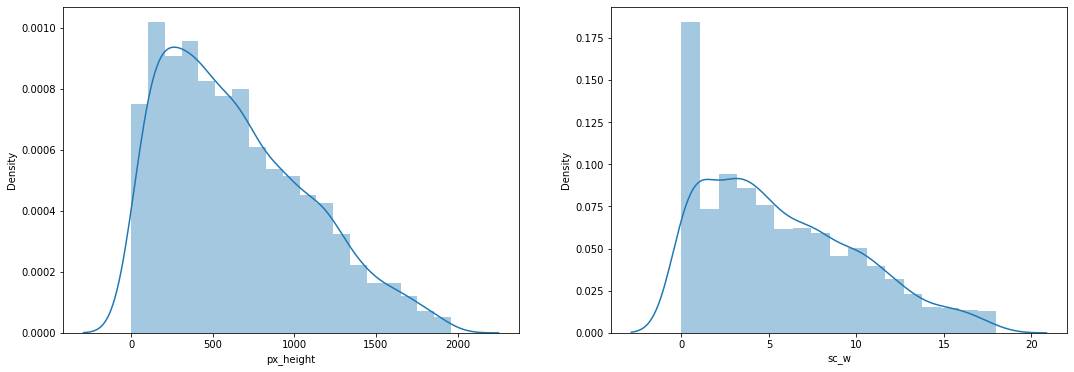

In [ ]:
# check the distribution of the pixel resolution height and screen weidth

fig = plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
sns.distplot(mobile_df['px_height'])
plt.subplot(1,2,2)
sns.distplot(mobile_df['sc_w'])

In [ ]:
# check how many obervation are present with pixel height 0

mobile_df[mobile_df['px_height']==0]

,mah,blue,clock_speed,dual_sim,Front_cam,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,...,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,...,0,994,1958,7,5,7,1,1,0,1


In [ ]:
# few observations are present so drop these observation using index method

mobile_df.drop(index=[1481,1933],inplace=True)

In [ ]:
# checking values of screen weidth having 0

mobile_df[mobile_df['sc_w']==0].shape[0]

179

In [ ]:
# replace zero eith nan values

mobile_df['sc_w']=mobile_df['sc_w'].replace(0,np.nan)

* 179 are a big number so it is important to fill these values.
KNN (K-Nearest Neighbour) is the best imputer algo to fill these values

In [ ]:
# import KKN imputer and impute the values with i nwighbours

from sklearn.impute import KNNImputer
knnimputer=KNNImputer(n_neighbors=1)
mobile_df=pd.DataFrame(knnimputer.fit_transform(mobile_df),columns=mobile_df.columns)

In [ ]:
# check the data type 

mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mah           1998 non-null   float64
 1   blue          1998 non-null   float64
 2   clock_speed   1998 non-null   float64
 3   dual_sim      1998 non-null   float64
 4   Front_cam     1998 non-null   float64
 5   four_g        1998 non-null   float64
 6   int_memory    1998 non-null   float64
 7   m_dep         1998 non-null   float64
 8   mobile_wt     1998 non-null   float64
 9   n_cores       1998 non-null   float64
 10  Primary_cam   1998 non-null   float64
 11  px_height     1998 non-null   float64
 12  px_width      1998 non-null   float64
 13  ram           1998 non-null   float64
 14  sc_h          1998 non-null   float64
 15  sc_w          1998 non-null   float64
 16  talk_time     1998 non-null   float64
 17  three_g       1998 non-null   float64
 18  touch_screen  1998 non-null 

In [ ]:
# make  a list of columns in which we convert datatype

list_of_columnss=['mah', 'blue', 'dual_sim', 'Front_cam', 'four_g',
       'int_memory', 'mobile_wt', 'n_cores', 'Primary_cam',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']

In [ ]:
# covert the data type to int16

for i in list_of_columnss:
 mobile_df[i]=mobile_df[i].astype('int16')

In [ ]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mah           1998 non-null   int16  
 1   blue          1998 non-null   int16  
 2   clock_speed   1998 non-null   float64
 3   dual_sim      1998 non-null   int16  
 4   Front_cam     1998 non-null   int16  
 5   four_g        1998 non-null   int16  
 6   int_memory    1998 non-null   int16  
 7   m_dep         1998 non-null   float64
 8   mobile_wt     1998 non-null   int16  
 9   n_cores       1998 non-null   int16  
 10  Primary_cam   1998 non-null   int16  
 11  px_height     1998 non-null   int16  
 12  px_width      1998 non-null   int16  
 13  ram           1998 non-null   int16  
 14  sc_h          1998 non-null   int16  
 15  sc_w          1998 non-null   int16  
 16  talk_time     1998 non-null   int16  
 17  three_g       1998 non-null   int16  
 18  touch_screen  1998 non-null 

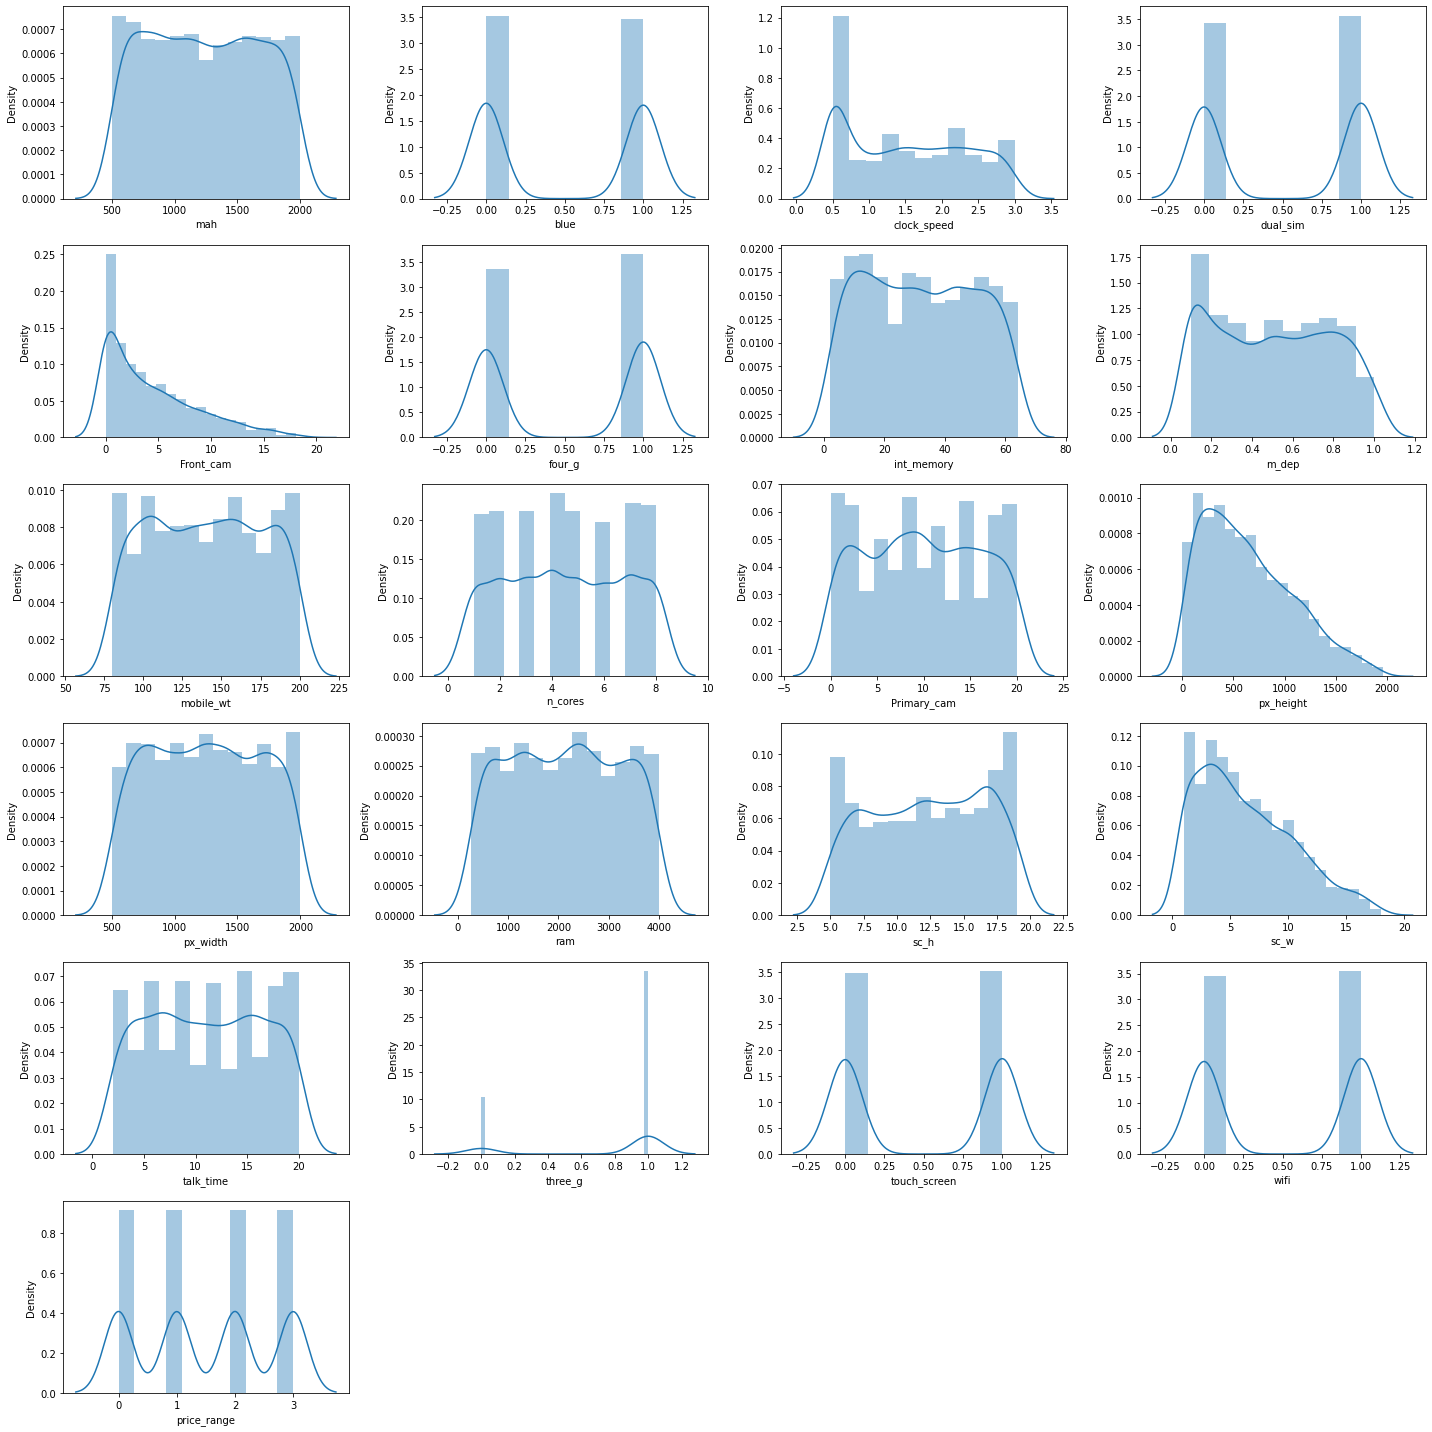

In [ ]:
# check the distribution 

fig = plt.figure(figsize=(20,20))
count=1
for i in mobile_df.columns:
  plt.subplot(6,4,count)
  sns.distplot(mobile_df[i])
  count+=1
  plt.tight_layout()

#### Chacking class imbalance

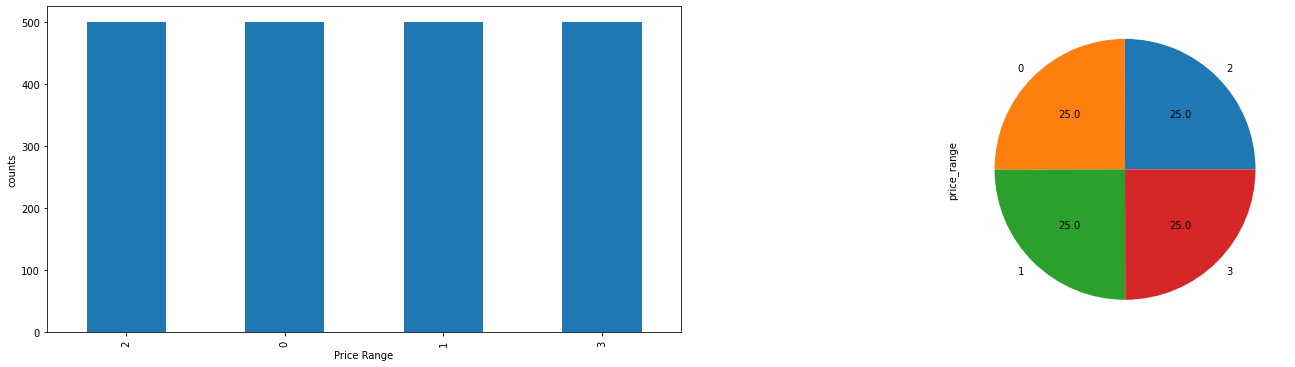

In [ ]:
# checking the values of the target variable

plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
mobile_df['price_range'].value_counts().plot(kind='bar')
plt.xlabel("Price Range")
plt.ylabel("counts")
plt.subplot(1,2,2)
mobile_df['price_range'].value_counts().plot(kind='pie',autopct='%.1f')

In [ ]:
# checking unique values using nunique function

mobile_df.nunique()

mah             1093
blue               2
clock_speed       26
dual_sim           2
Front_cam         20
four_g             2
int_memory        63
m_dep             10
mobile_wt        121
n_cores            8
Primary_cam       21
px_height       1136
px_width        1109
ram             1561
sc_h              15
sc_w              18
talk_time         19
three_g            2
touch_screen       2
wifi               2
price_range        4
dtype: int64

#### create numarical and categorical columns using above nunique function

In [ ]:
# create numarical columns

numarical_columns=['mah', 'clock_speed', 'Front_cam', 'int_memory', 'm_dep', 'mobile_wt', 'Primary_cam','px_height', 'px_width', 'ram', 'sc_h', 'sc_w','talk_time']

In [ ]:
# create numarical columns

categorical_columns=['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g','touch_screen', 'wifi', 'price_range']
     

### Outlier Detection

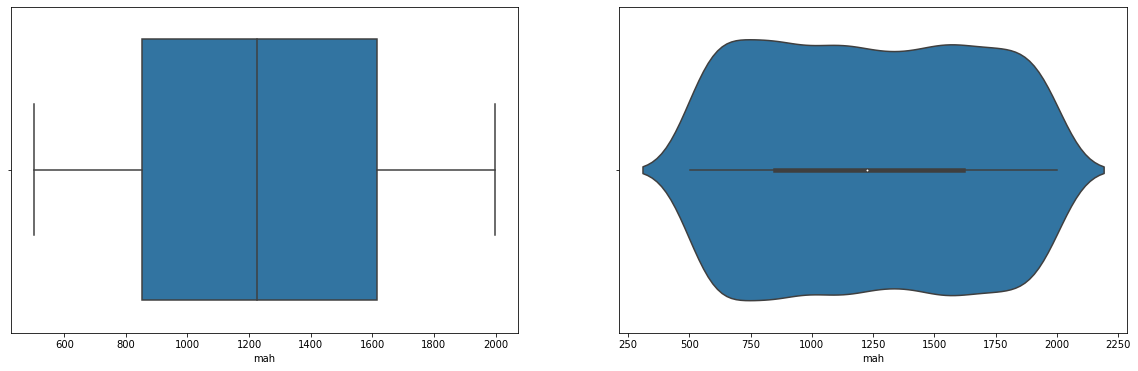

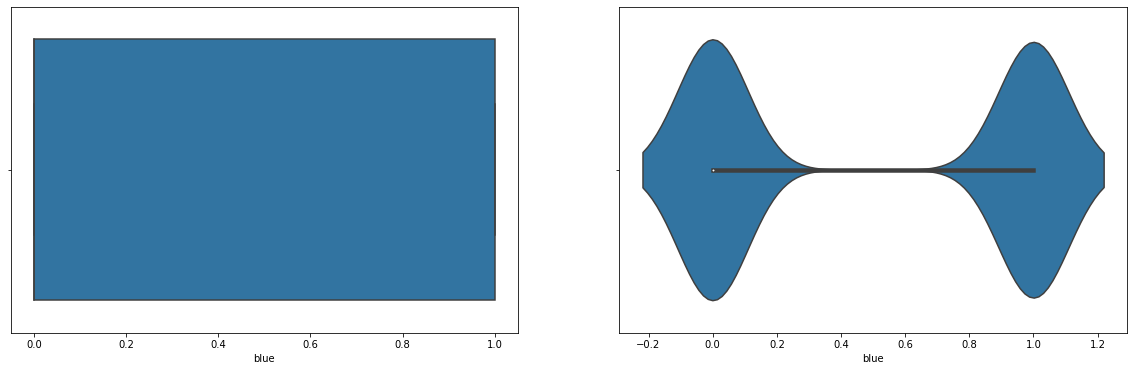

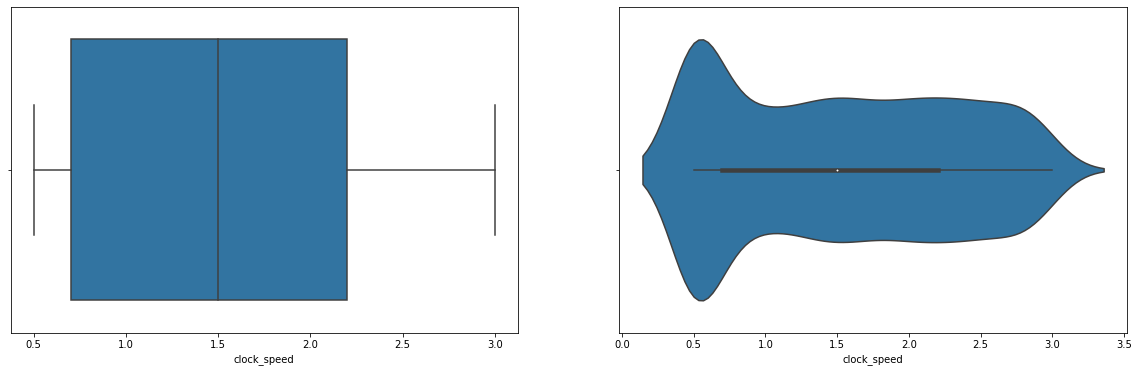

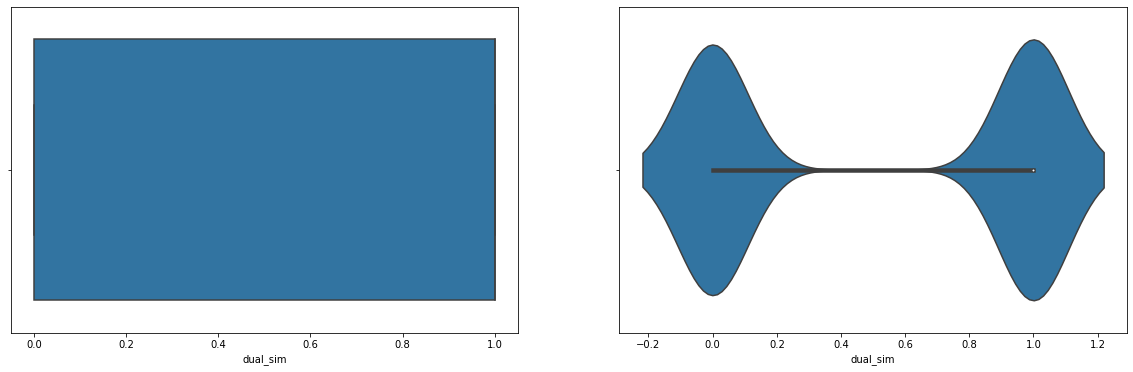

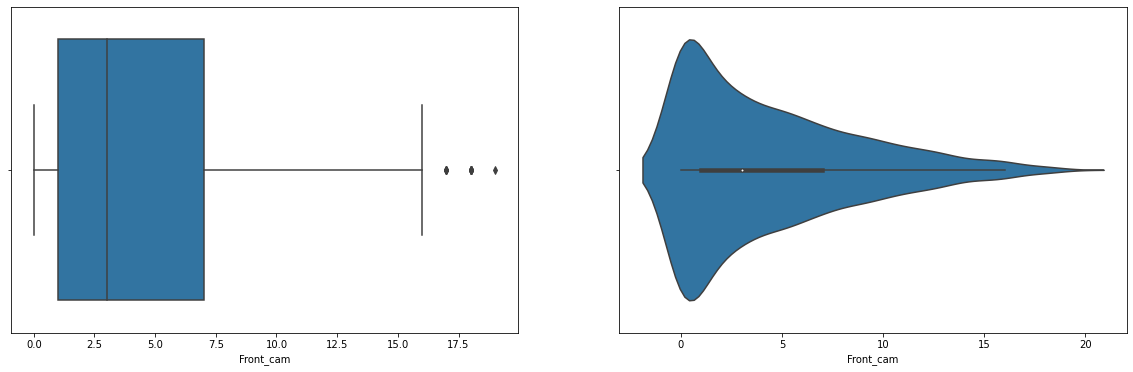

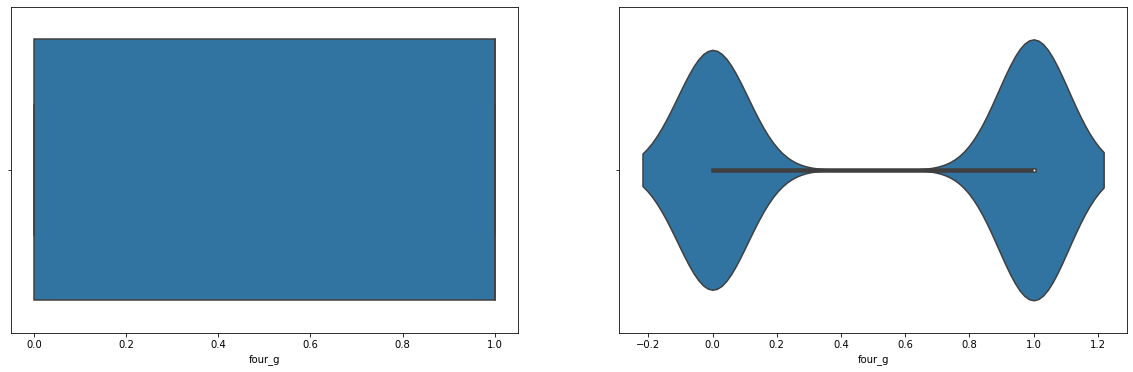

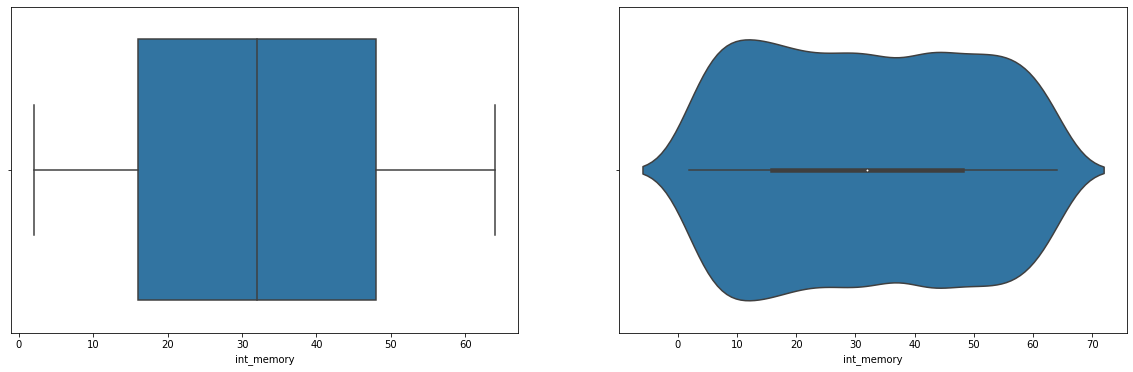

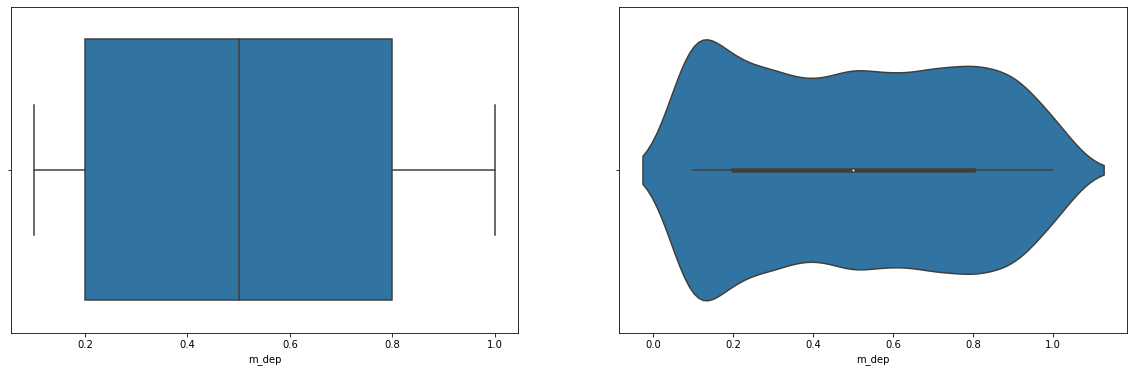

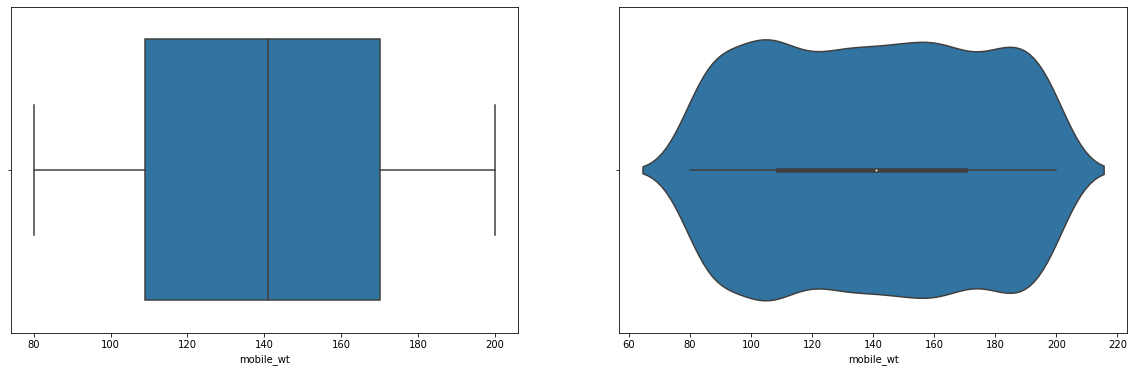

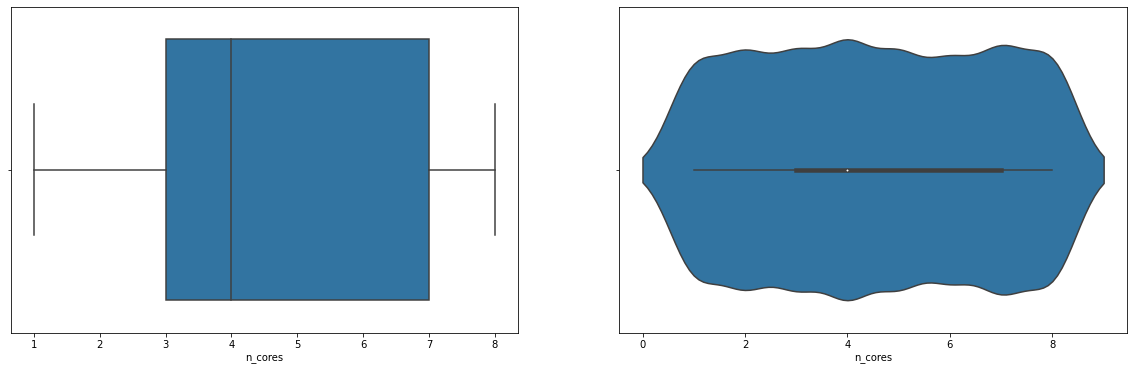

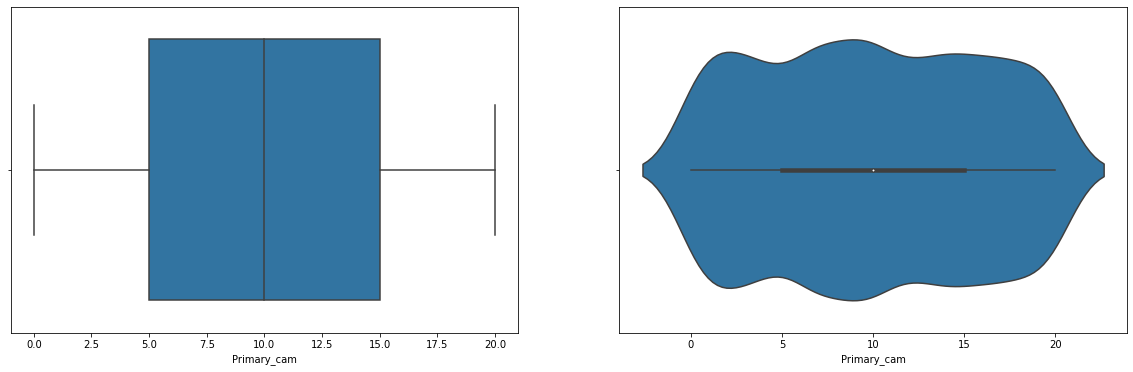

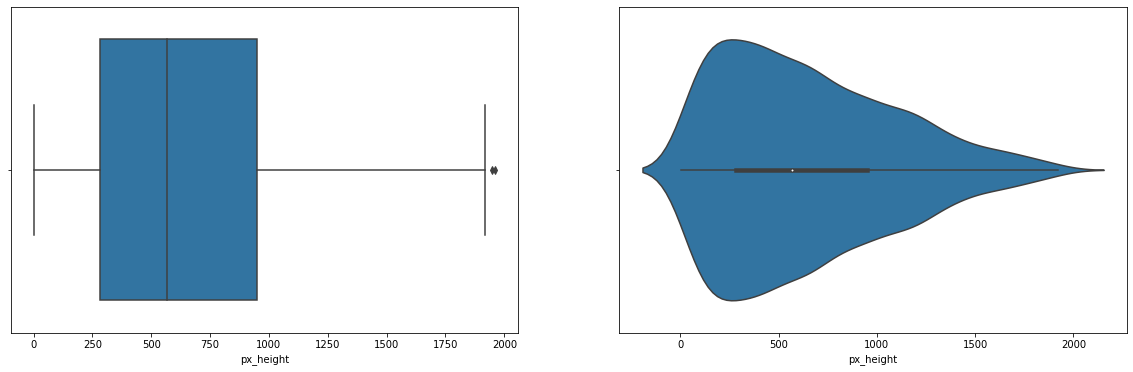

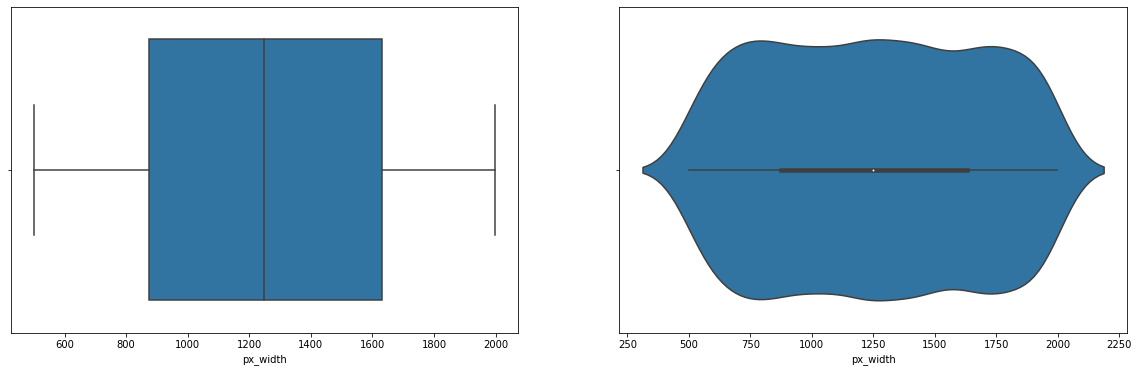

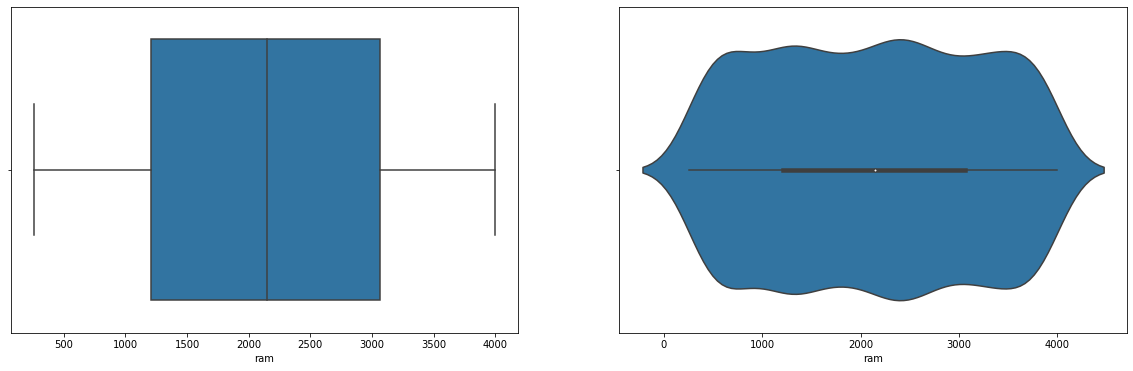

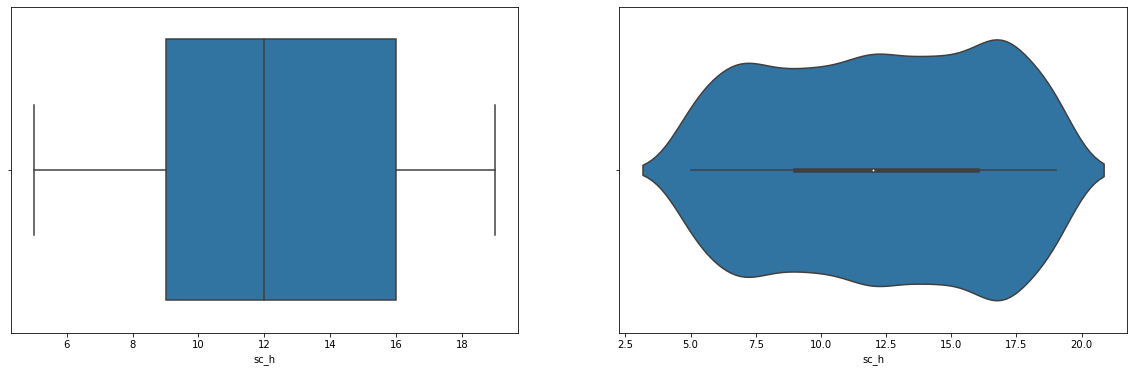

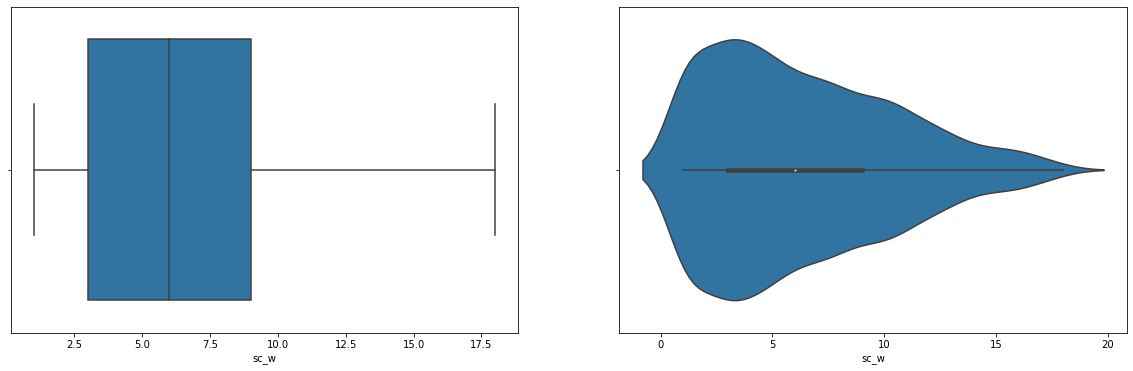

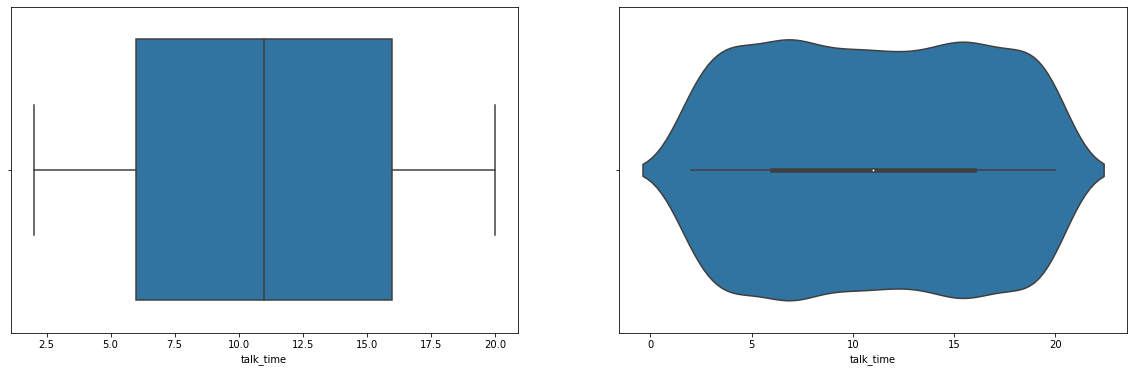

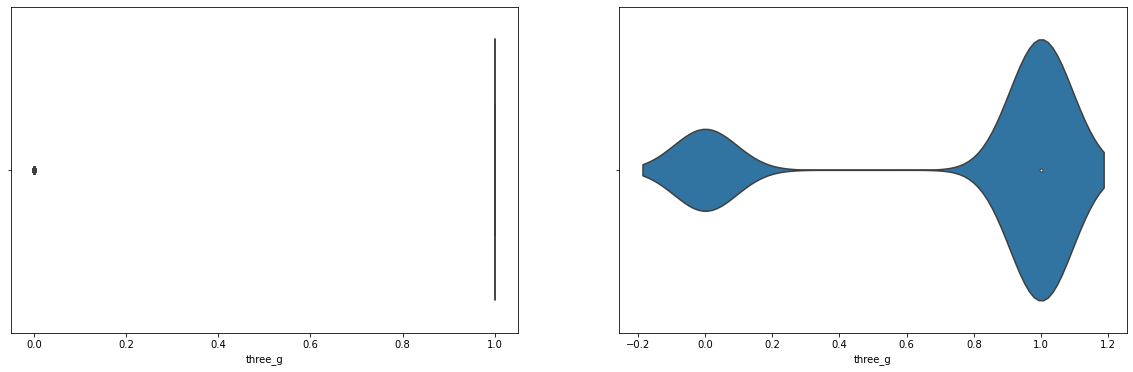

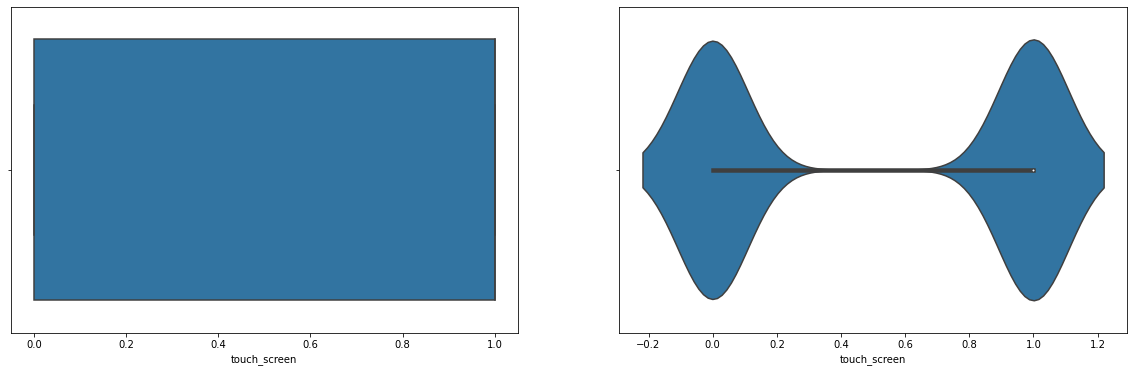

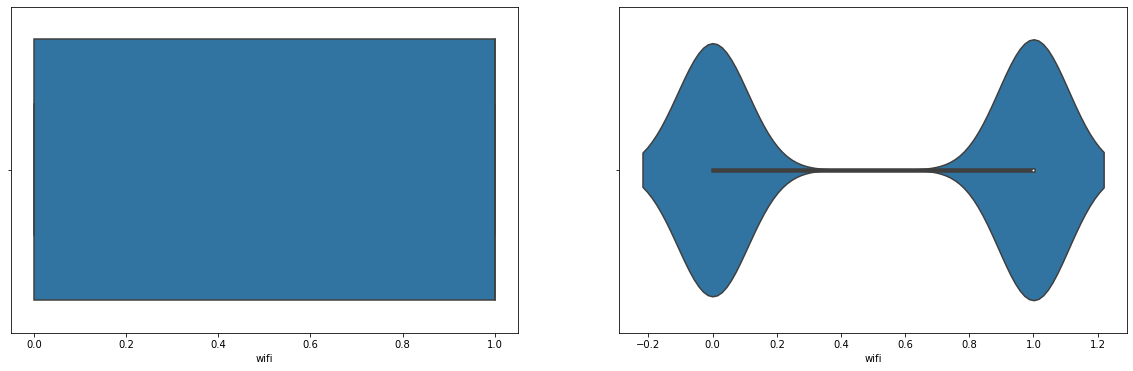

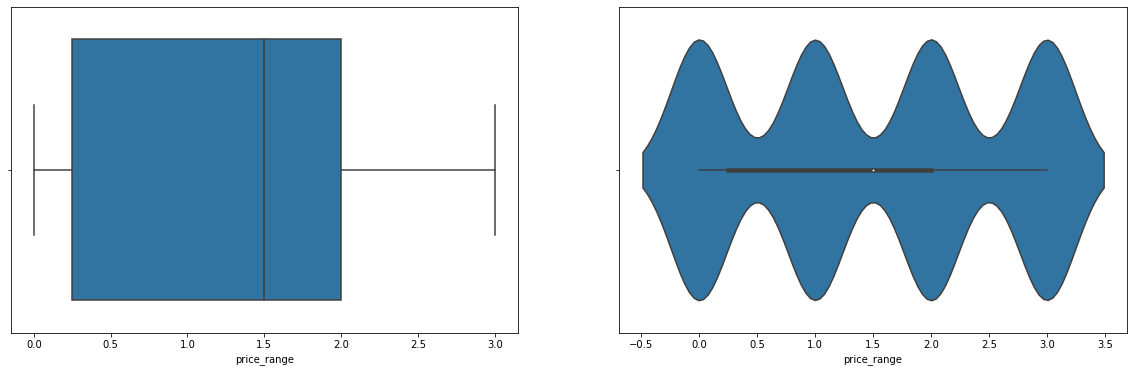

In [ ]:
# check outliers

for i in mobile_df.columns:
  fig = plt.figure(figsize=(20, 6))
  plt.subplot(1,2,1)
  sns.boxplot(mobile_df[i])
  plt.subplot(1,2,2)
  sns.violinplot(mobile_df[i])
  plt.show()

### outlier treatments

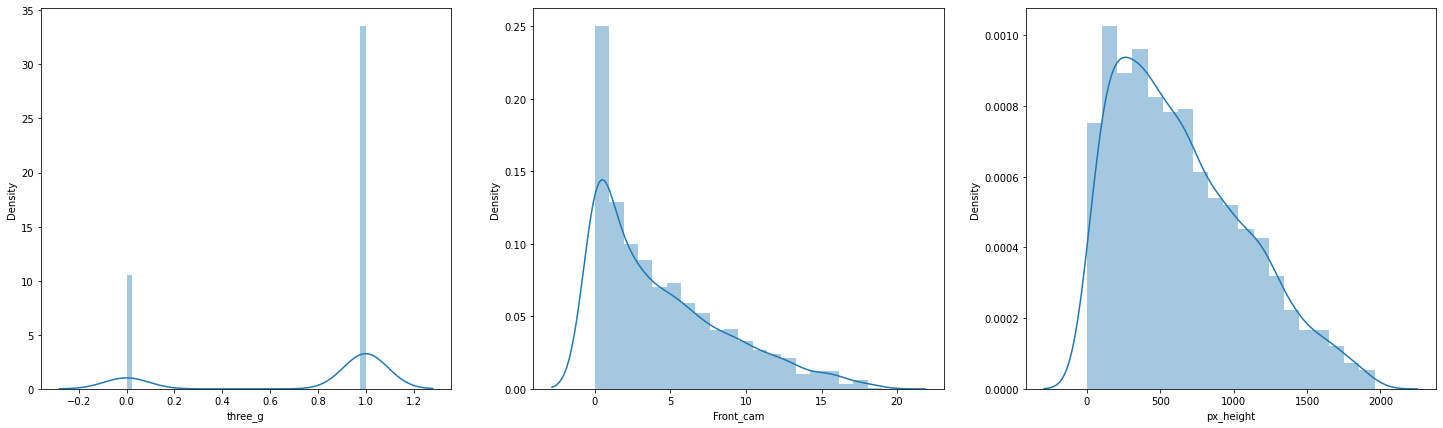

In [ ]:
# check the distribution of all the outlier colums again

plt.figure(figsize=(25,7))
plt.subplot(1,3,1)
sns.distplot(mobile_df['three_g'])
plt.subplot(1,3,2)
sns.distplot(mobile_df['Front_cam'])
plt.subplot(1,3,3)
sns.distplot(mobile_df['px_height'])

In [ ]:
# 25% percentile of front camera column

p25=mobile_df['Front_cam'].quantile(0.25)

# 75% percentile of front camera column

p75=mobile_df['Front_cam'].quantile(0.75)

print(p25,p75)

1.0 7.0


In [ ]:
# Interquartile range 

iqr=p75-p25
iqr

6.0

In [ ]:
# upper limit

upper_limit=p75+1.5*iqr
print(upper_limit)

# lower limit

lower_limit=p25-1.5*iqr
print(lower_limit)

16.0
-8.0


In [ ]:
# check the outlier values

mobile_df[mobile_df['Front_cam']>upper_limit].count()

mah             18
blue            18
clock_speed     18
dual_sim        18
Front_cam       18
four_g          18
int_memory      18
m_dep           18
mobile_wt       18
n_cores         18
Primary_cam     18
px_height       18
px_width        18
ram             18
sc_h            18
sc_w            18
talk_time       18
three_g         18
touch_screen    18
wifi            18
price_range     18
dtype: int64

In [ ]:
# contain only non outliers value

mobile_df=mobile_df[mobile_df['Front_cam']<upper_limit]

In [ ]:
# 25% percentile of pixel height column

p25=mobile_df['px_height'].quantile(0.25)

# 75% percentile of pixel height column

p75=mobile_df['px_height'].quantile(0.75)

In [ ]:
# Interquartile range

iqr=p75-p25
iqr

661.5

In [ ]:
# Upper limit

upper_limit=p75+1.5*iqr

# lower limit

lower_limit=p25-1.5*iqr

In [ ]:
# check the outliers value

mobile_df[mobile_df['px_height']>upper_limit].count()

mah             2
blue            2
clock_speed     2
dual_sim        2
Front_cam       2
four_g          2
int_memory      2
m_dep           2
mobile_wt       2
n_cores         2
Primary_cam     2
px_height       2
px_width        2
ram             2
sc_h            2
sc_w            2
talk_time       2
three_g         2
touch_screen    2
wifi            2
price_range     2
dtype: int64

In [ ]:
# contain only non outliers value

mobile_df=mobile_df[mobile_df['px_height']<upper_limit]

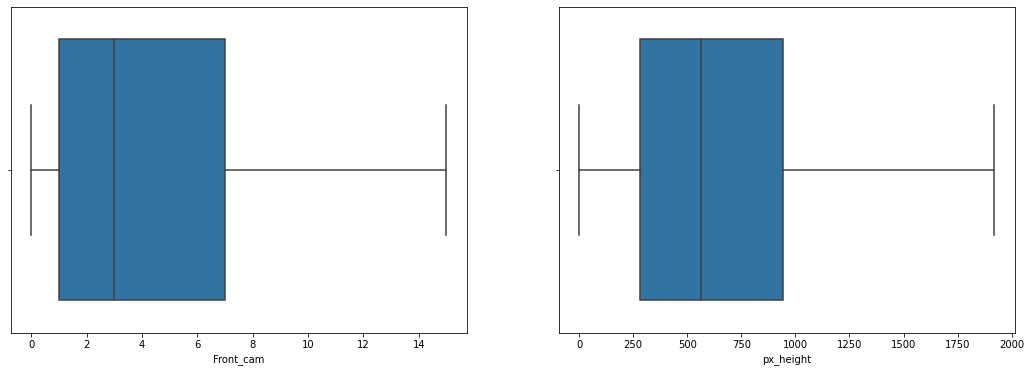

In [ ]:
fig = plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
sns.boxplot(mobile_df['Front_cam'])
plt.subplot(1,2,2)
sns.boxplot(mobile_df['px_height'])

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Univariate analysis on categorical columns

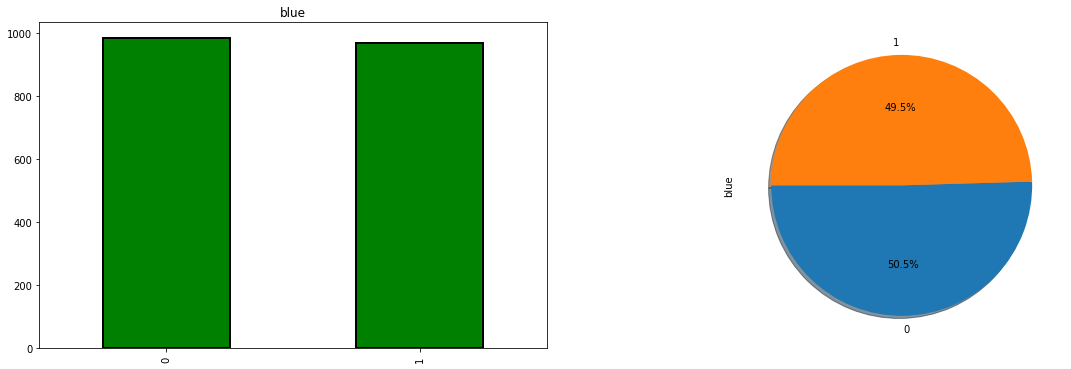

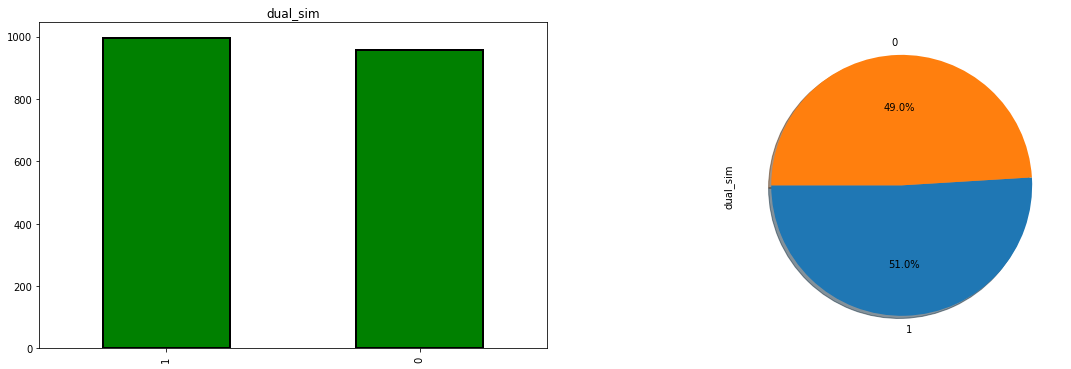

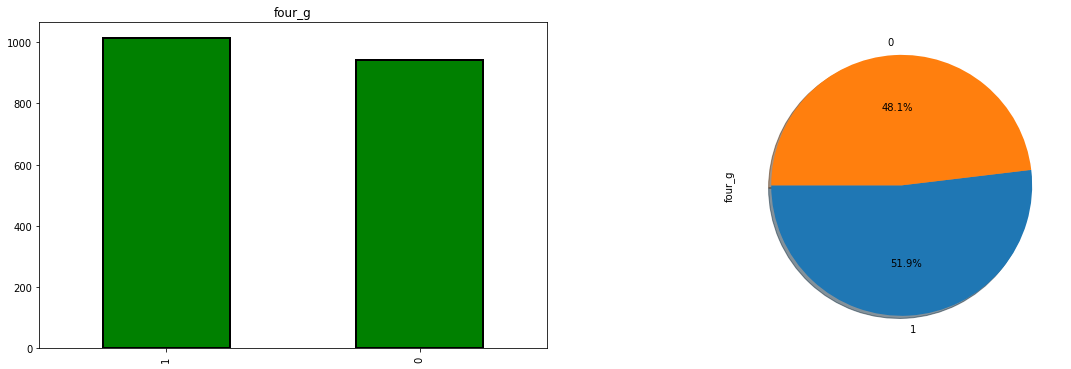

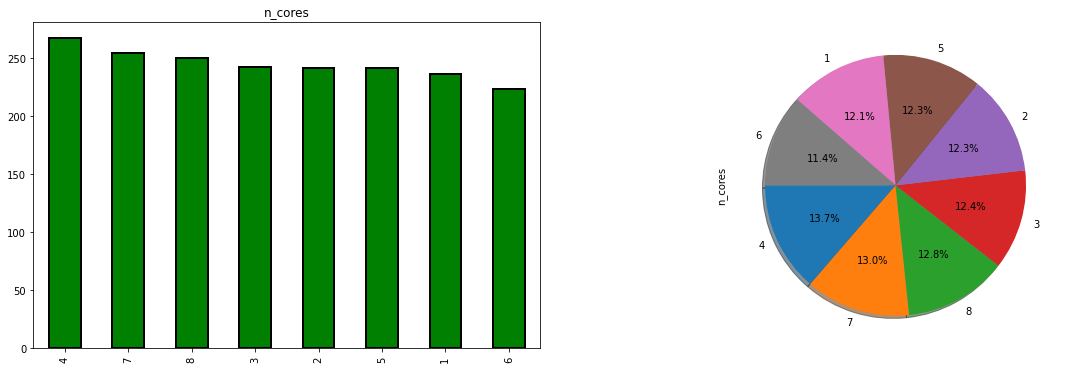

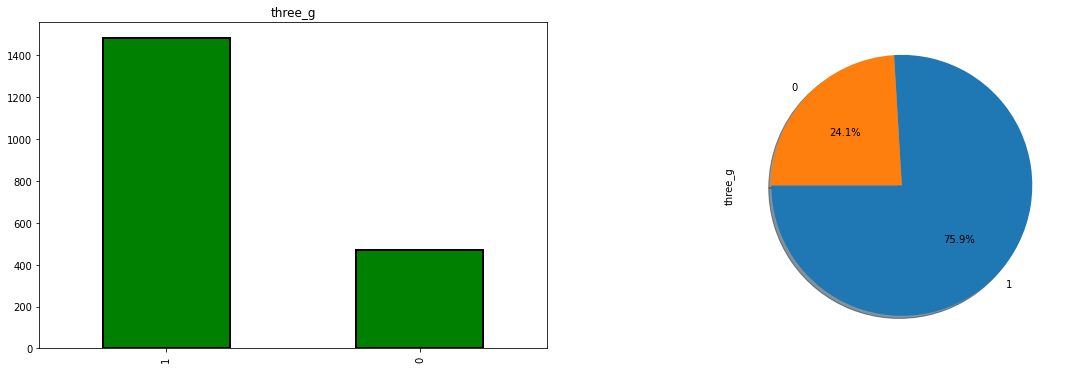

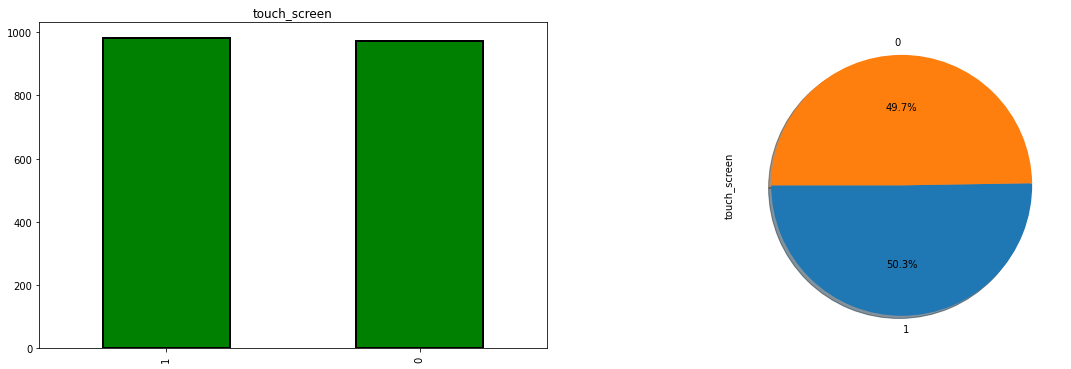

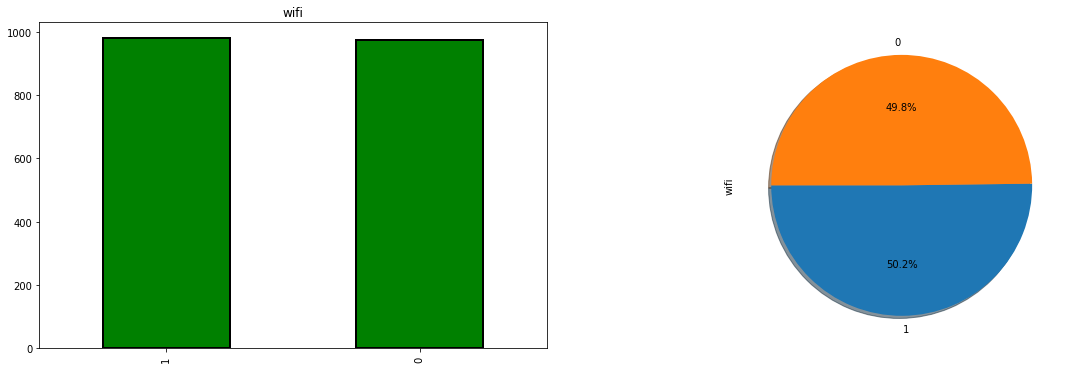

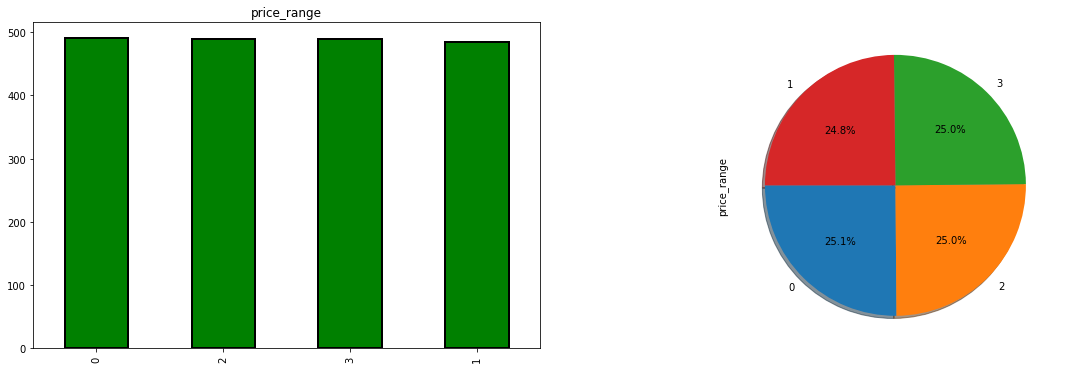

In [ ]:
for i in categorical_columns:
 fig = plt.figure(figsize=(20, 6))
 plt.subplot(1,2,1)
 mobile_df[i].value_counts().plot(kind='bar',color='green',edgecolor='black',linewidth=2)
 plt.title(i)
 plt.subplot(1,2,2)
 mobile_df[i].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,startangle=180)
 plt.show()
     

#### Chart - 2 - Univariate analysis on numarical columns

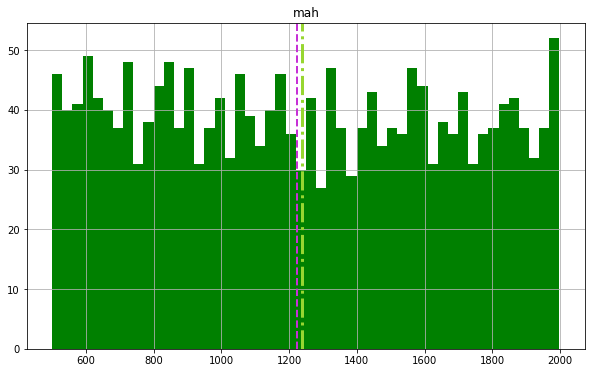

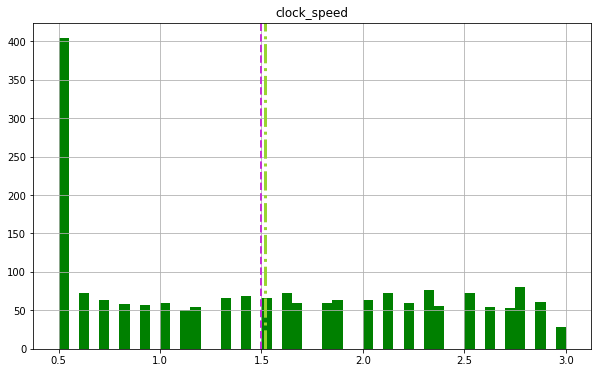

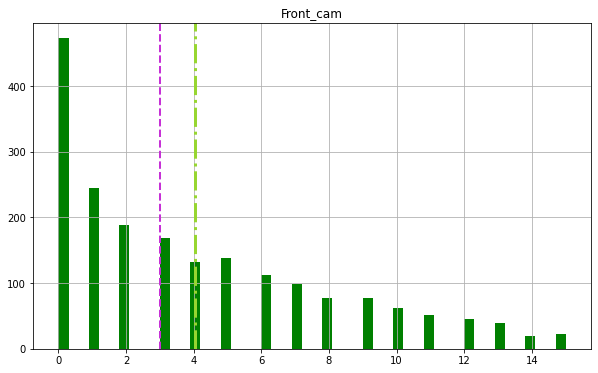

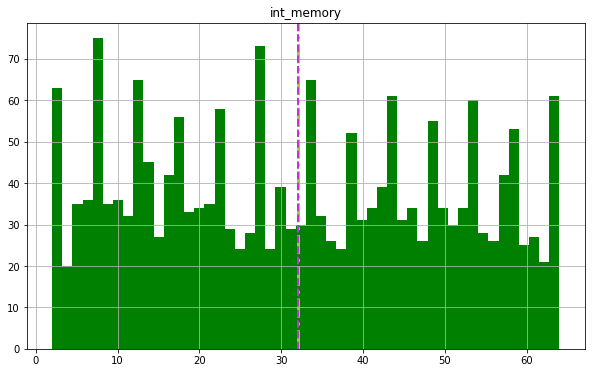

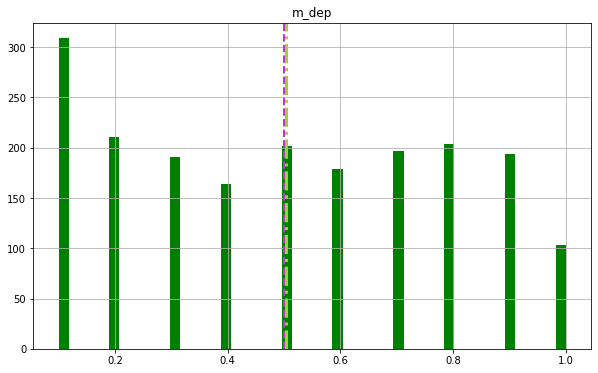

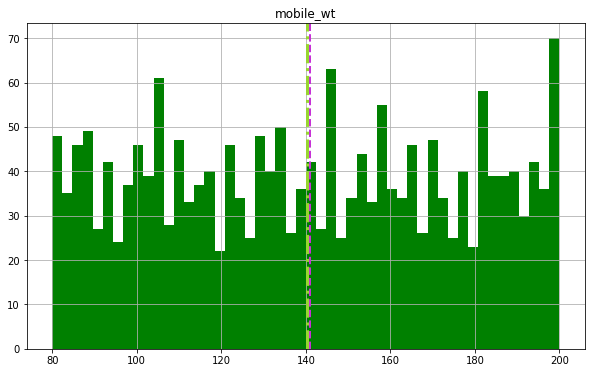

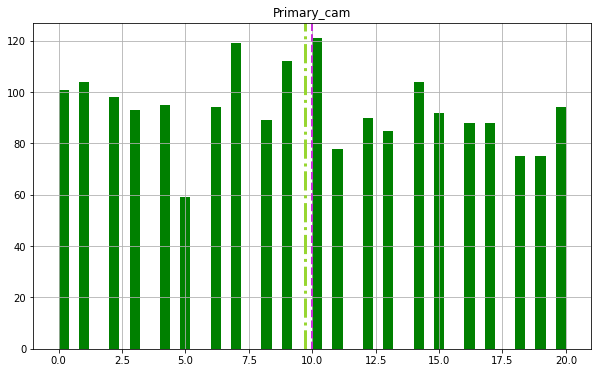

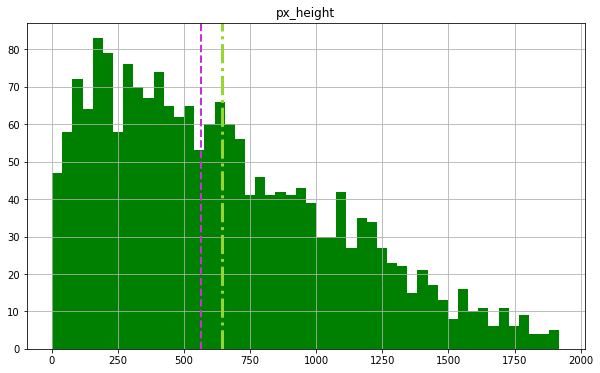

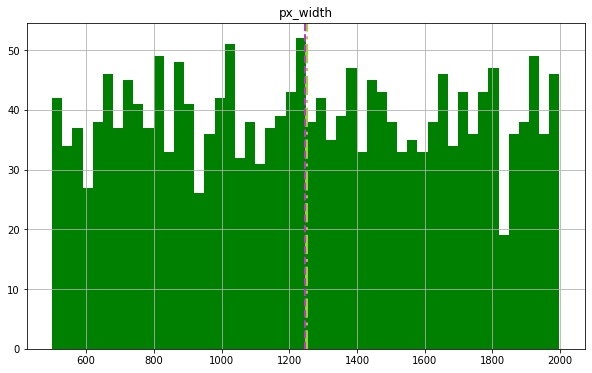

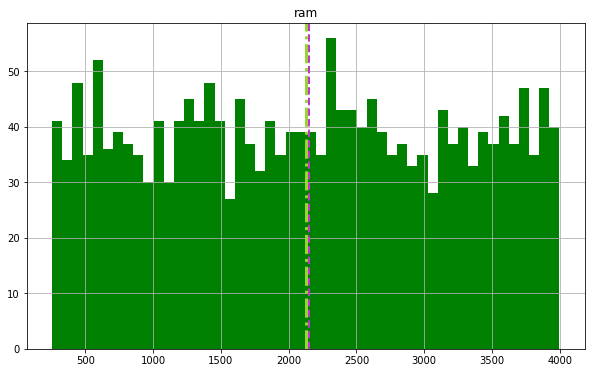

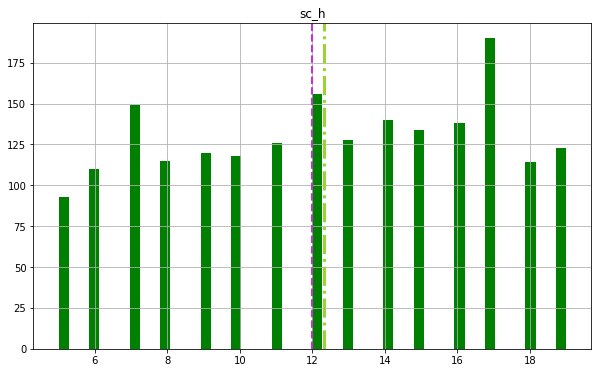

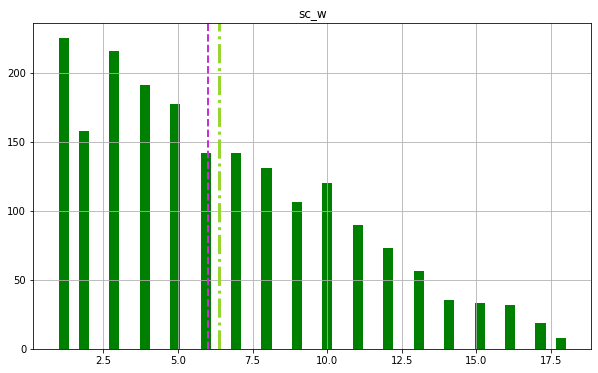

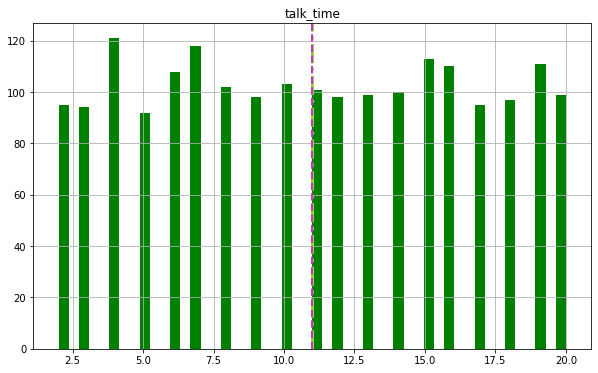

In [ ]:
for i in numarical_columns:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.gca()
    feature = mobile_df[i]
    feature.hist(bins=50, ax = ax,color='green')
    ax.axvline(feature.mean(), color='#97d631', linestyle='dashdot', linewidth=3)
    ax.axvline(feature.median(), color='#c631d6', linestyle='dashed', linewidth=2)    
    ax.set_title(i)
plt.show()

#### Chart - 3 - Bivariate analysis with target variable

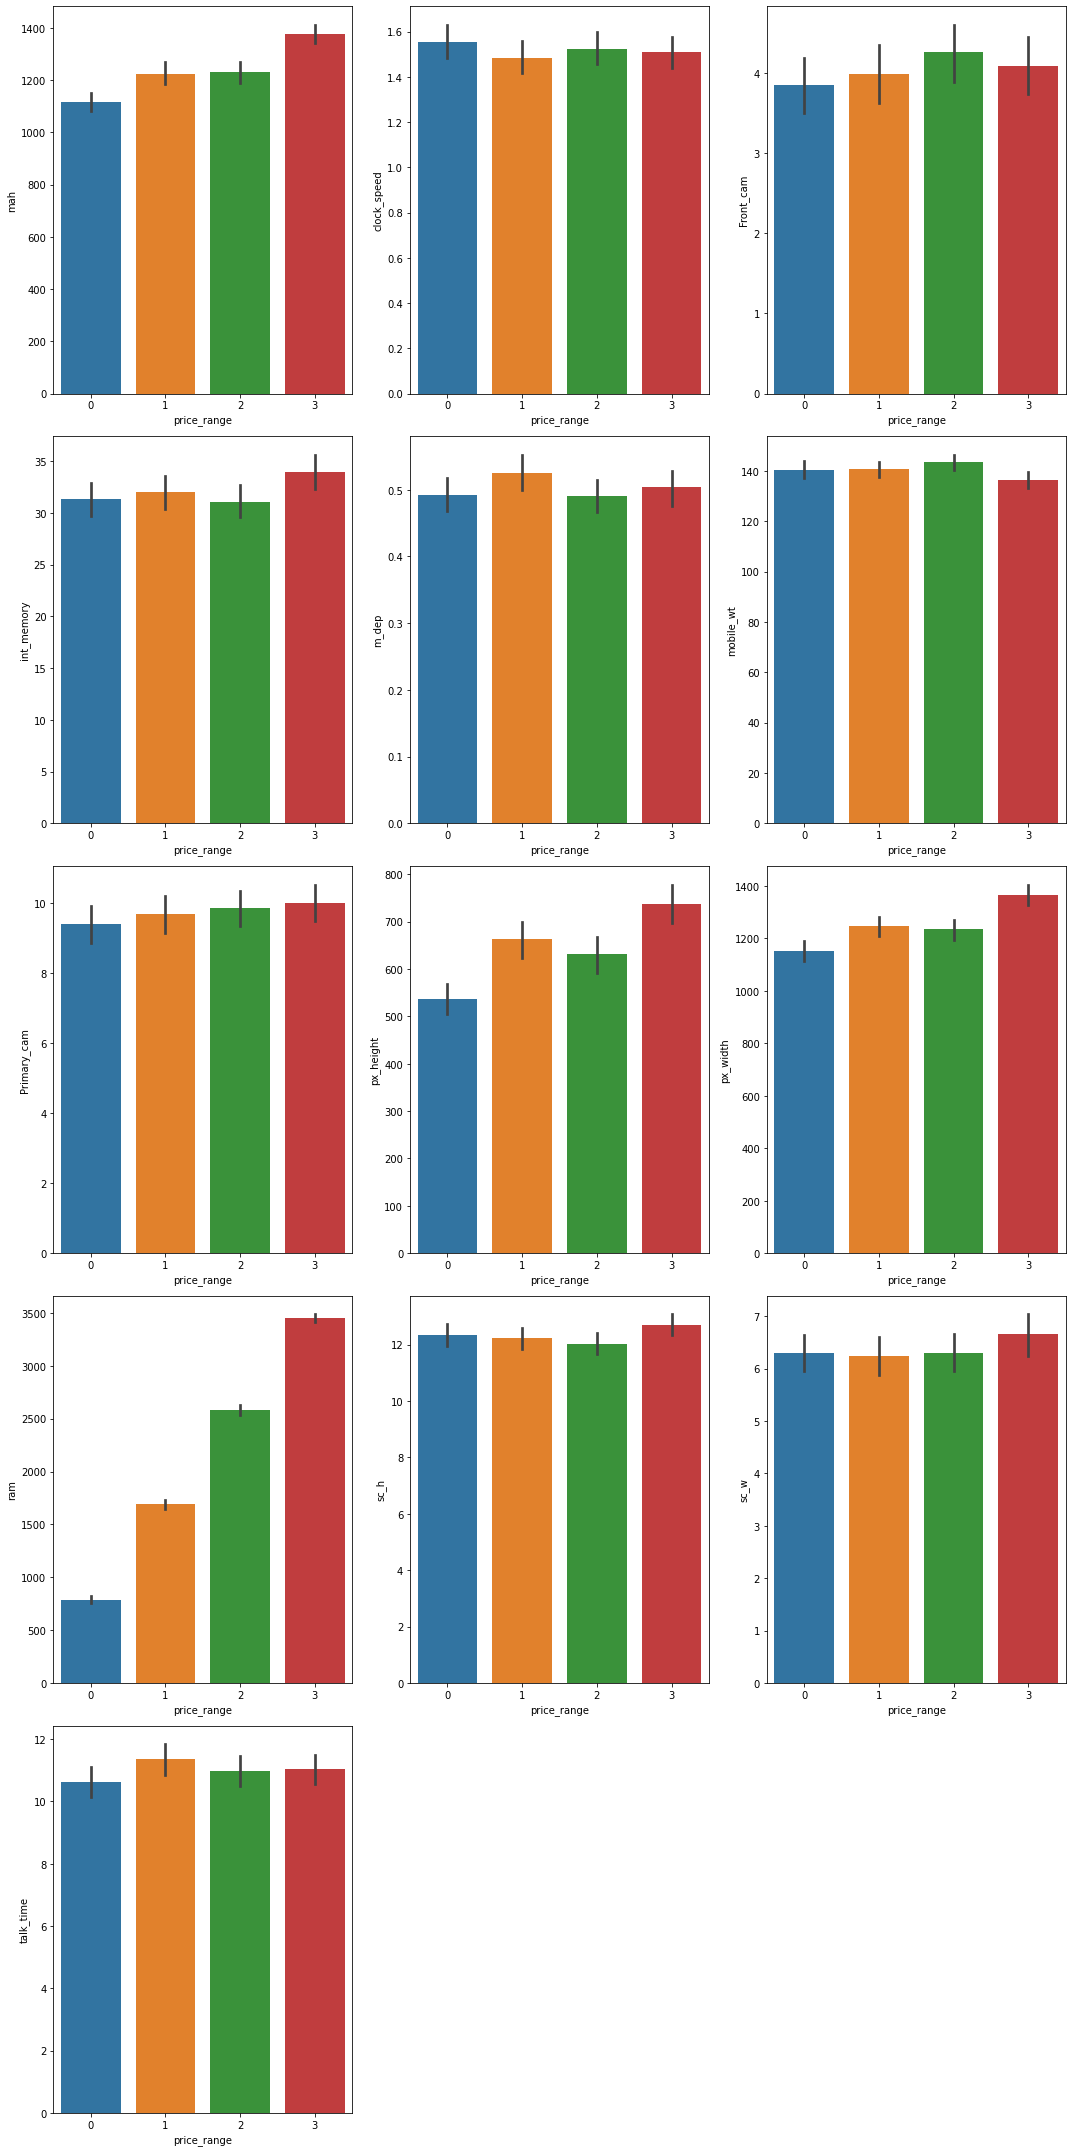

In [ ]:
fig = plt.figure(figsize=(15,30))
count=1
for i in numarical_columns:
  plt.subplot(5,3,count)
  sns.barplot(x=mobile_df['price_range'],y=mobile_df[i])
  count+=1
  plt.tight_layout()

#### Chart - 4

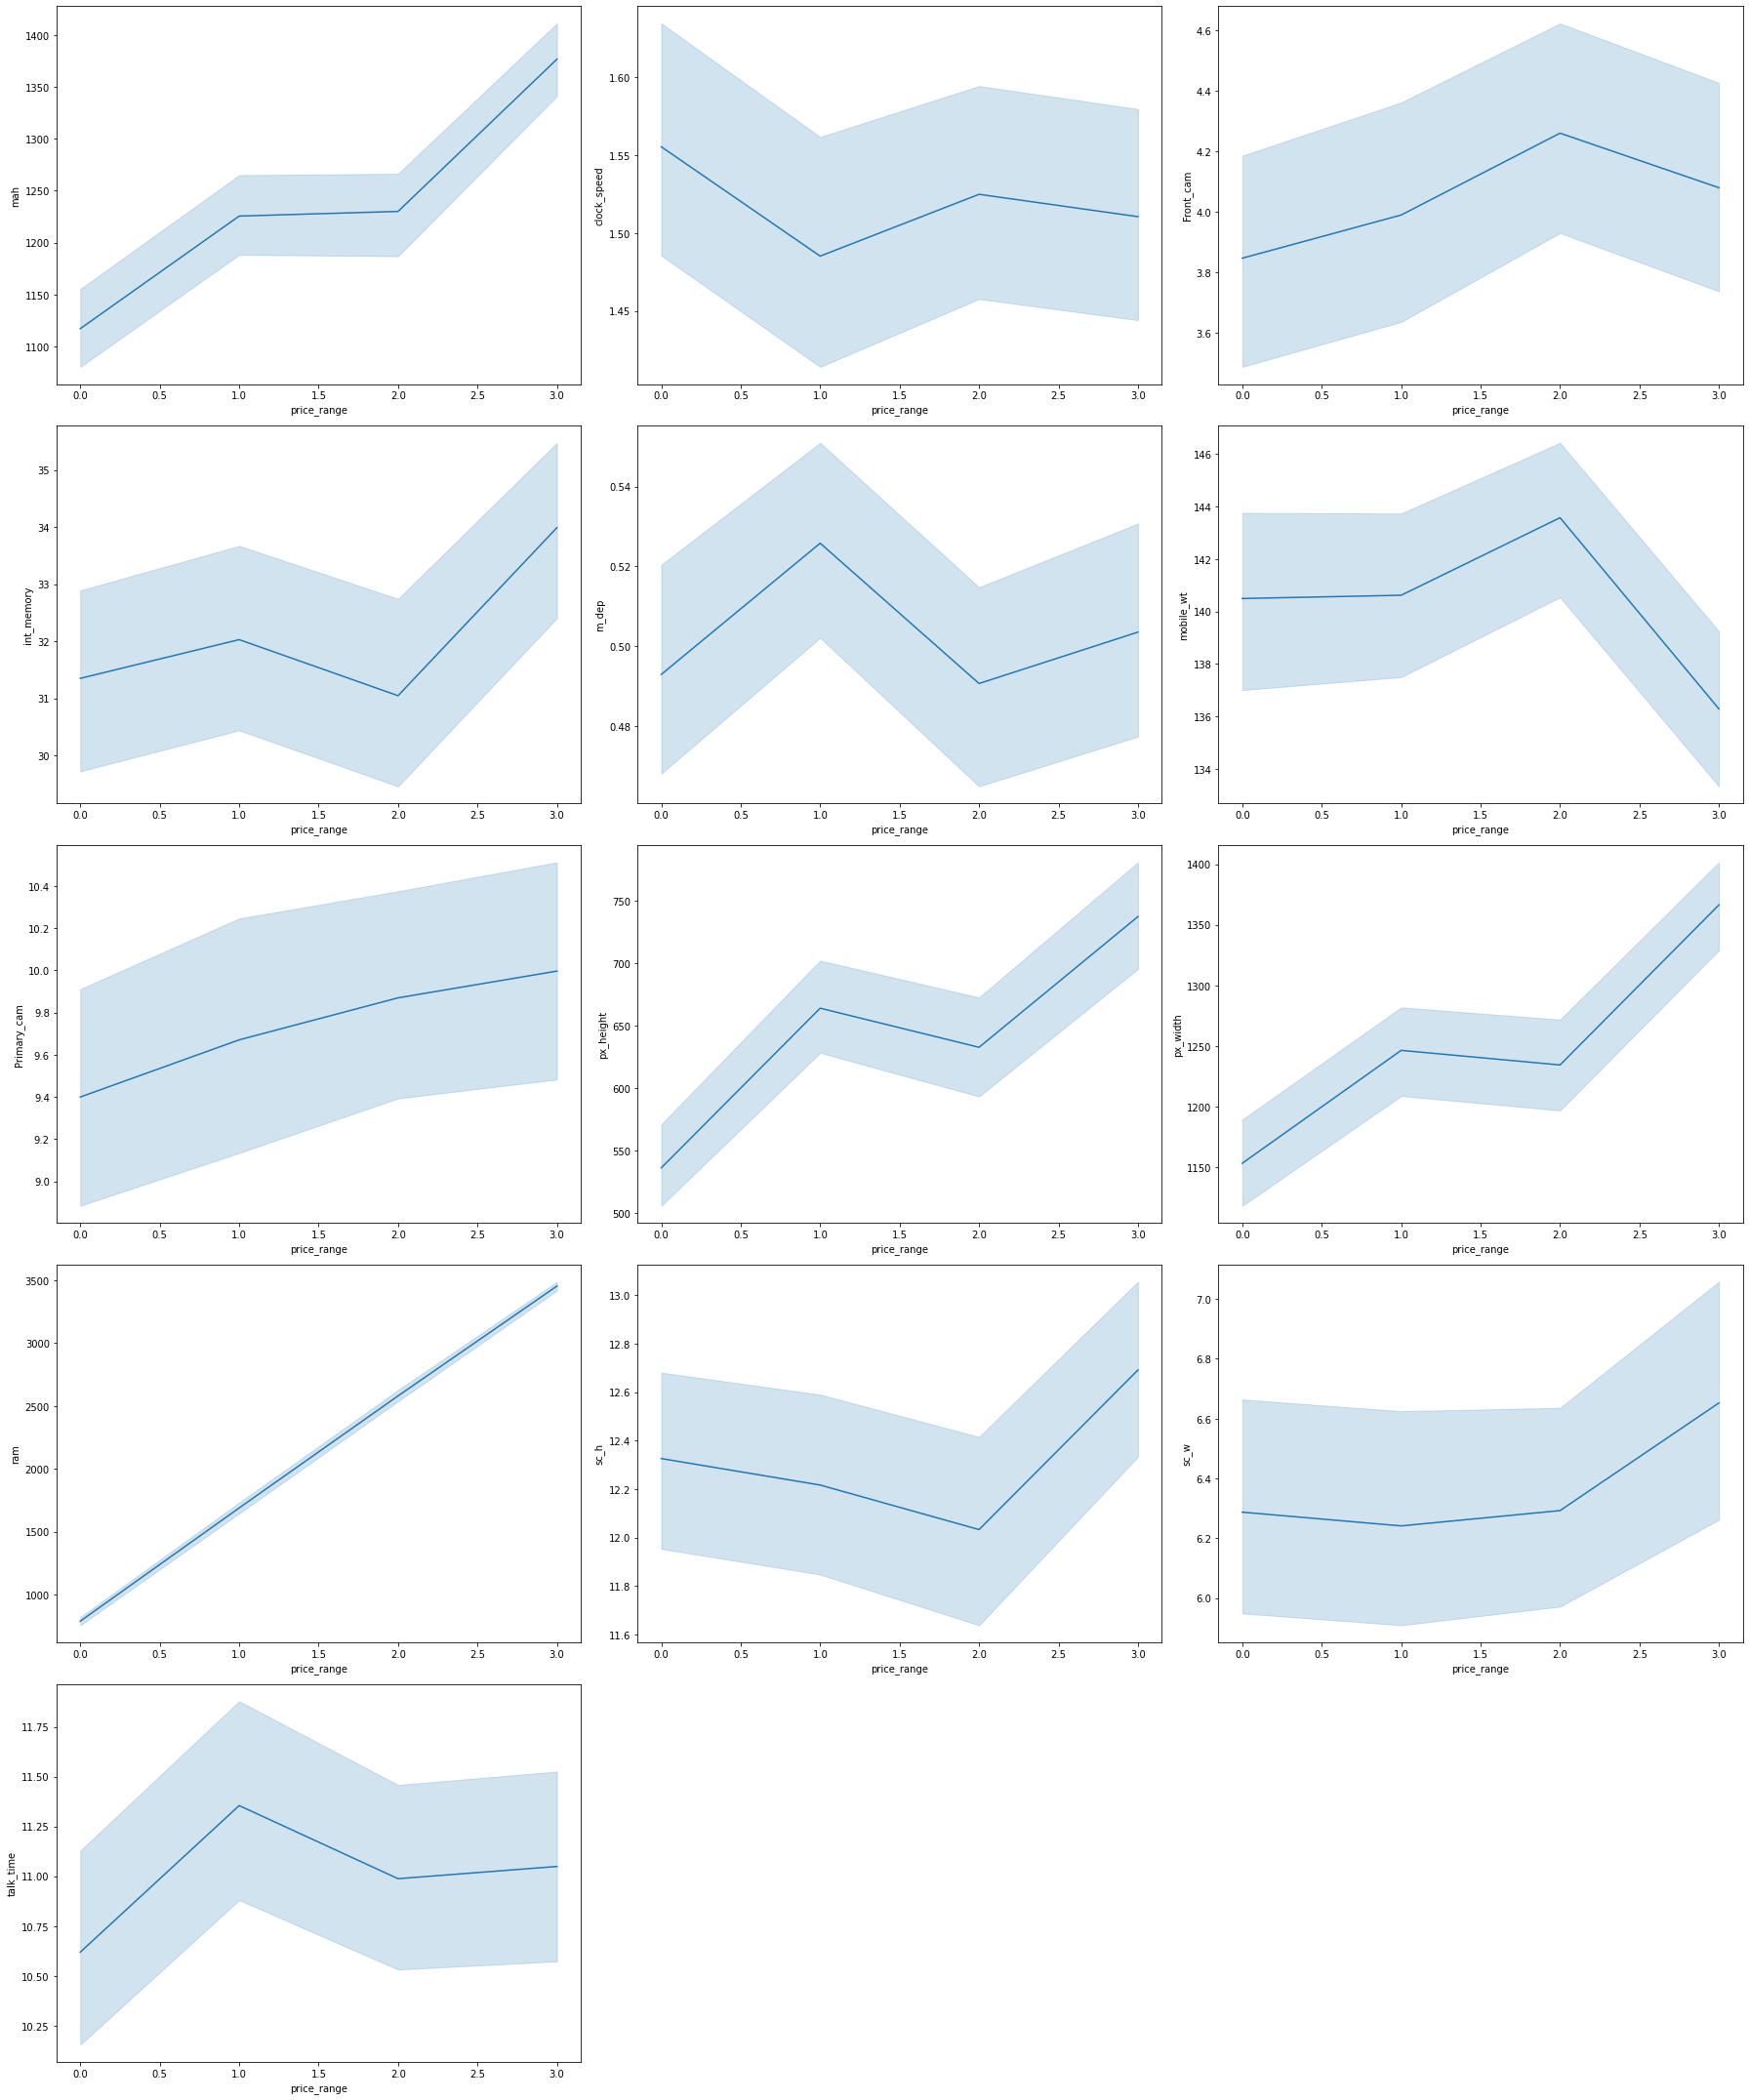

In [ ]:
fig = plt.figure(figsize=(25,30))
count=1
for i in numarical_columns:
  plt.subplot(5,3,count)
  sns.lineplot(x=mobile_df['price_range'],y=mobile_df[i])
  count+=1
  plt.tight_layout()

#### Chart - 5

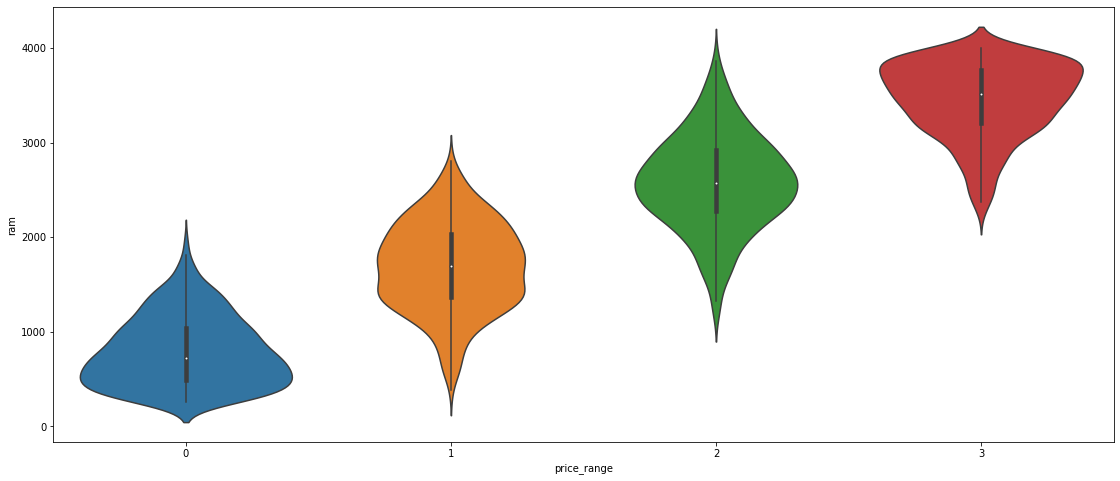

In [ ]:
fig = plt.figure(figsize=(19,8))
sns.violinplot(x=mobile_df['price_range'],y=mobile_df['ram'])

#### Chart - 6

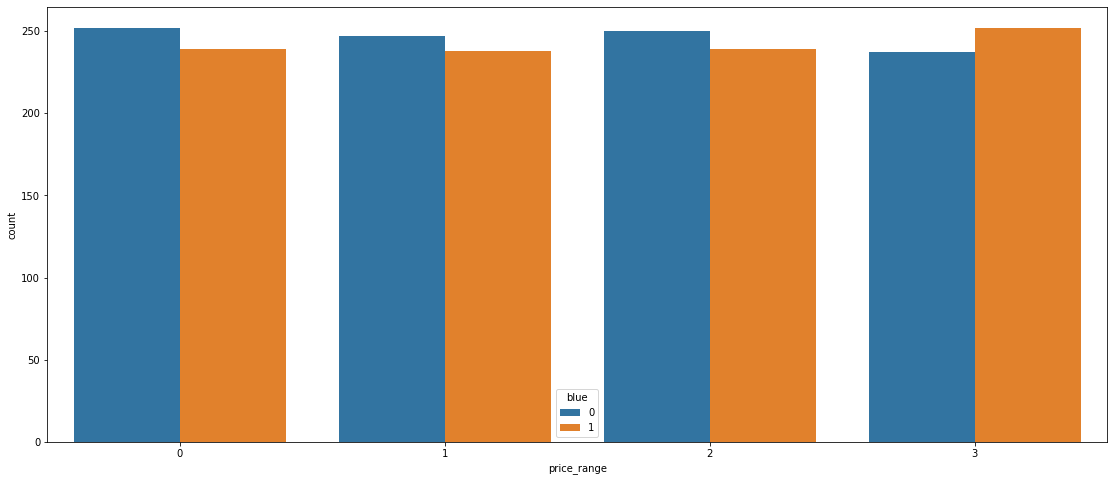

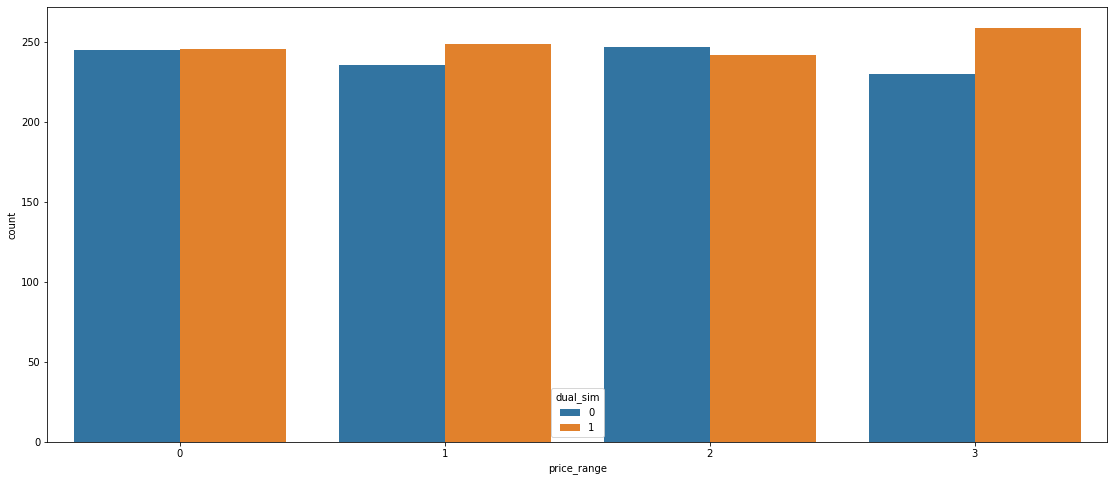

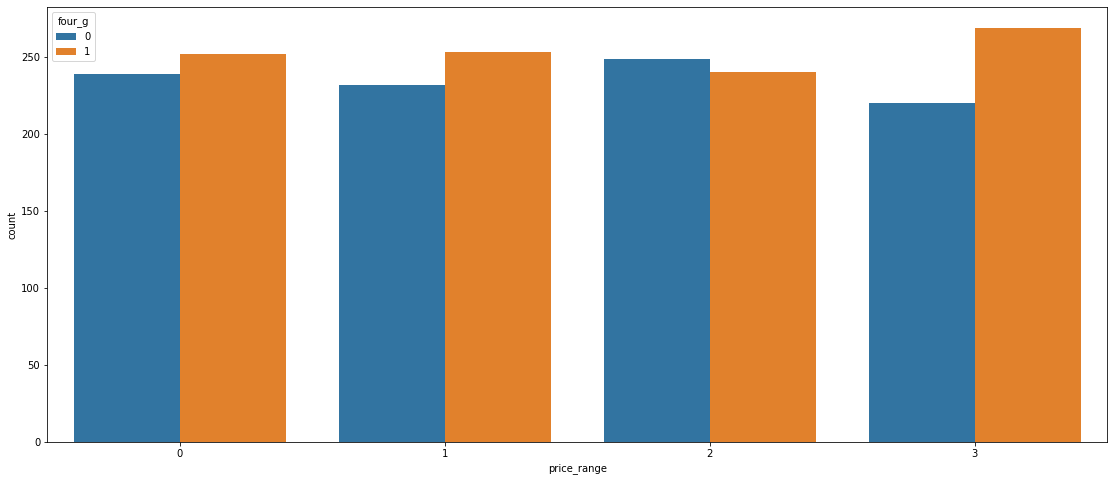

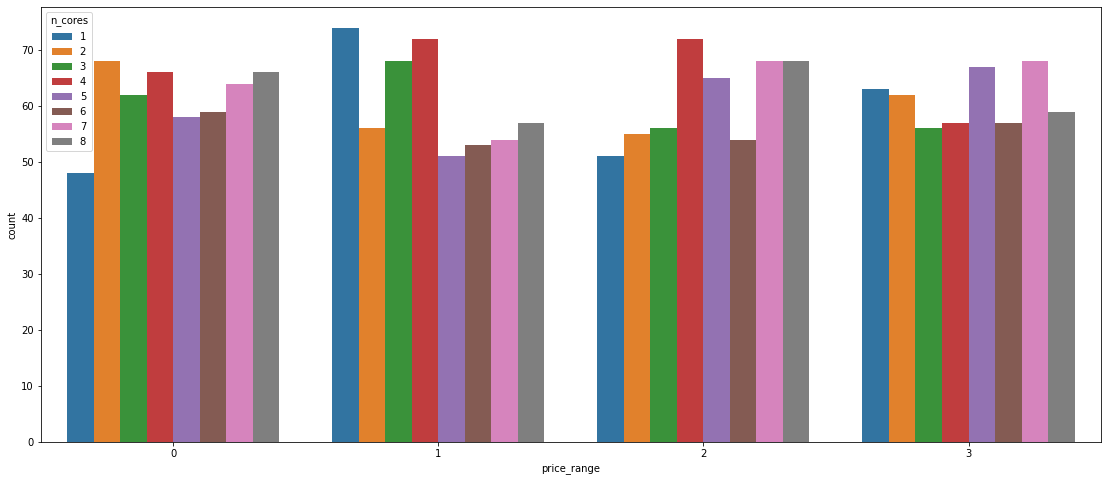

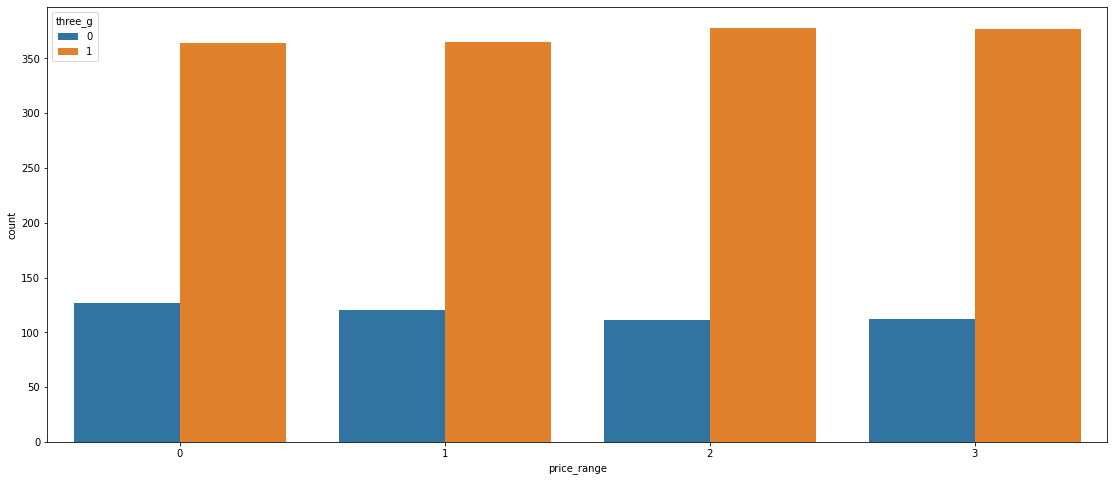

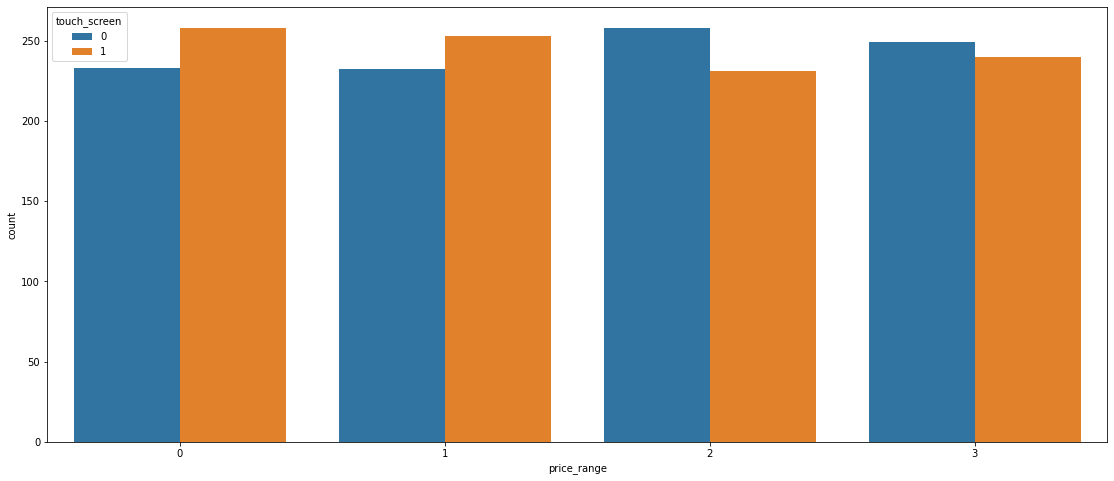

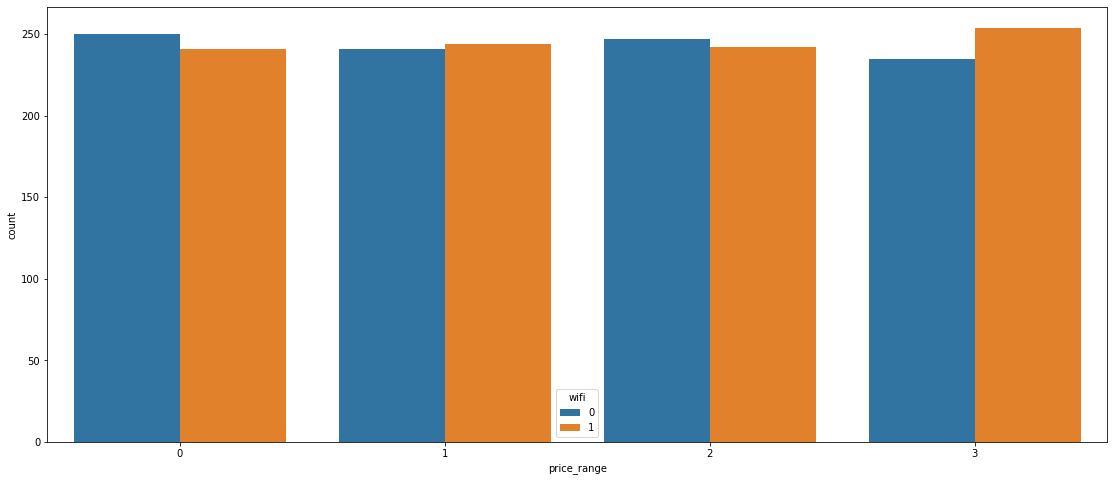

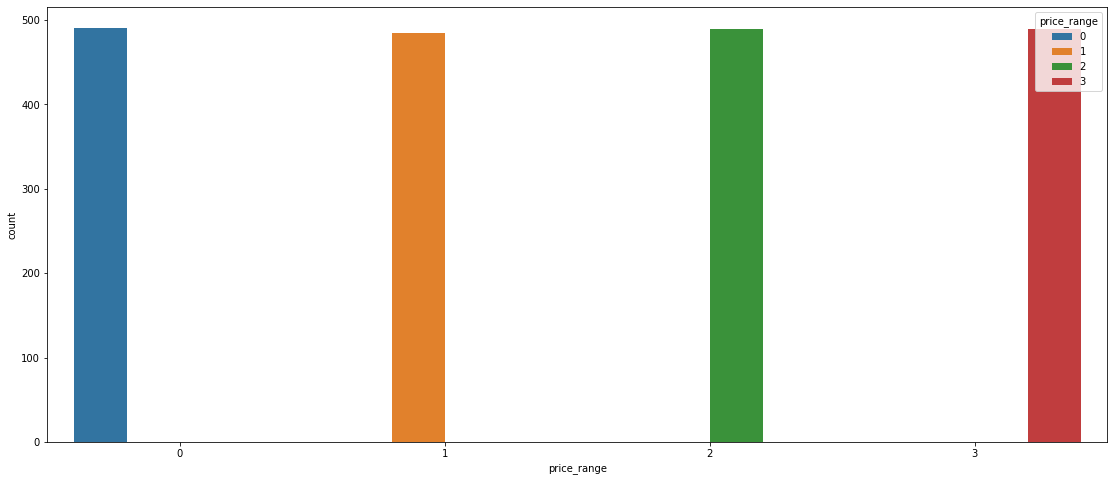

In [ ]:
for i in categorical_columns:
  fig = plt.figure(figsize=(19,8))
  sns.countplot(x=mobile_df['price_range'],hue=mobile_df[i])
  plt.show()

#### **Chart - 7 - Multivariate analysis**

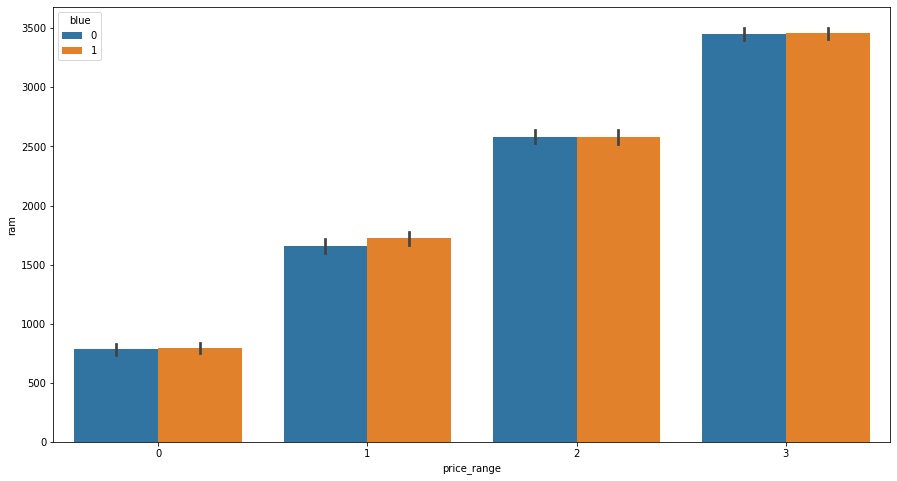

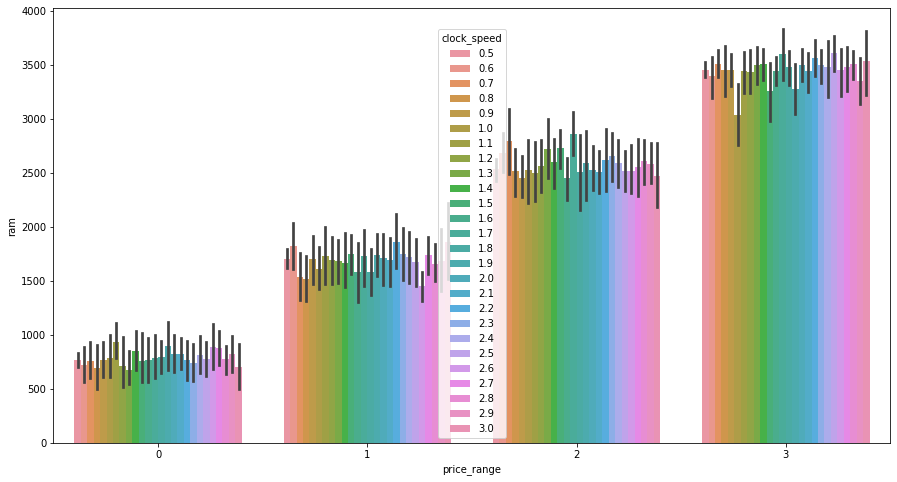

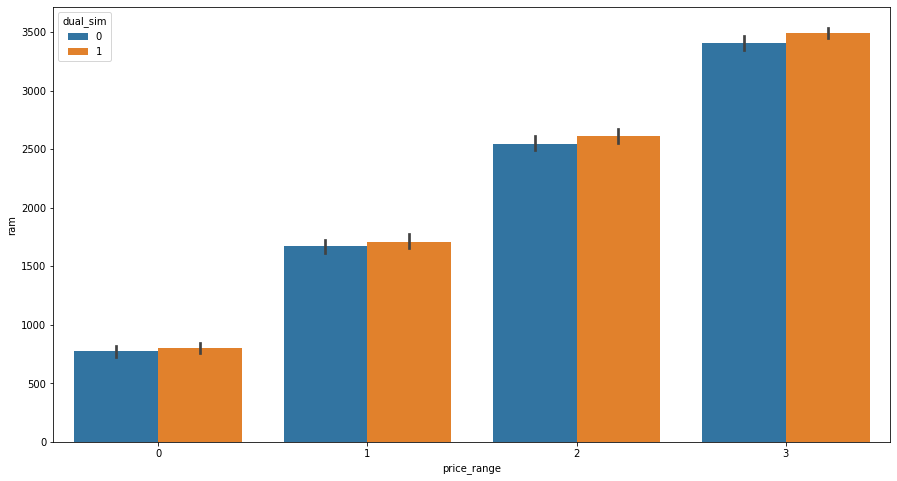

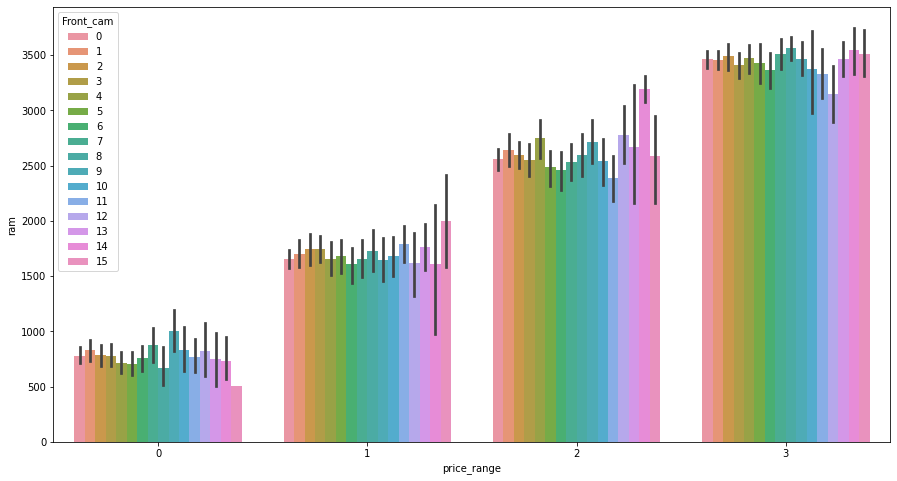

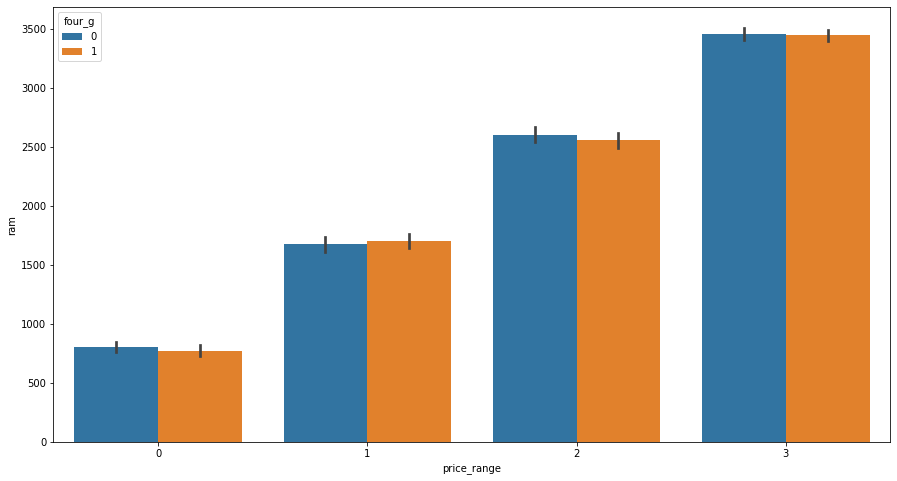

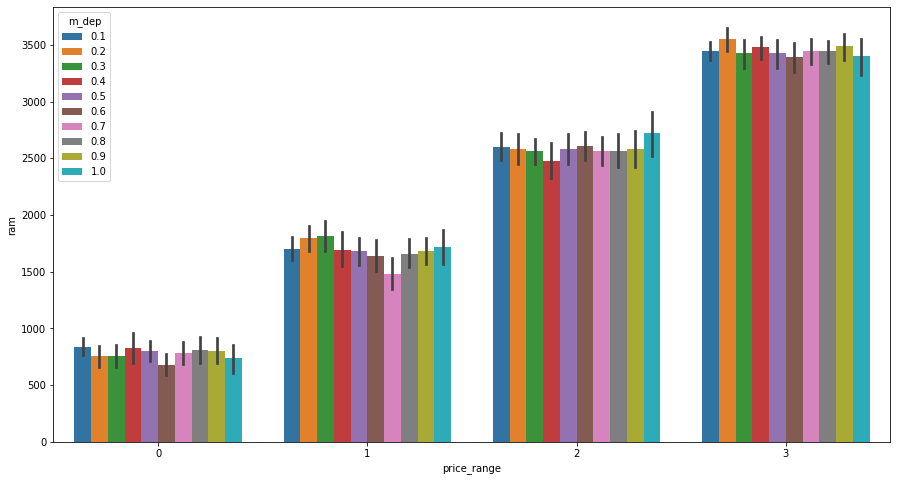

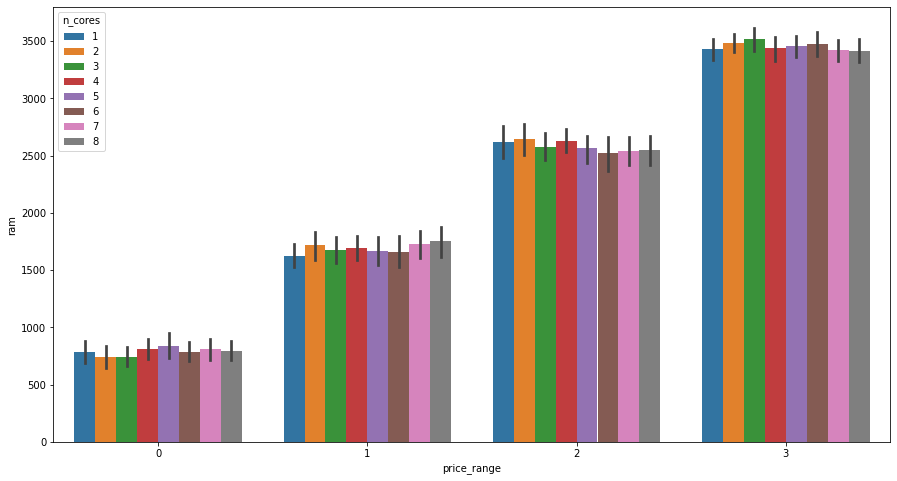

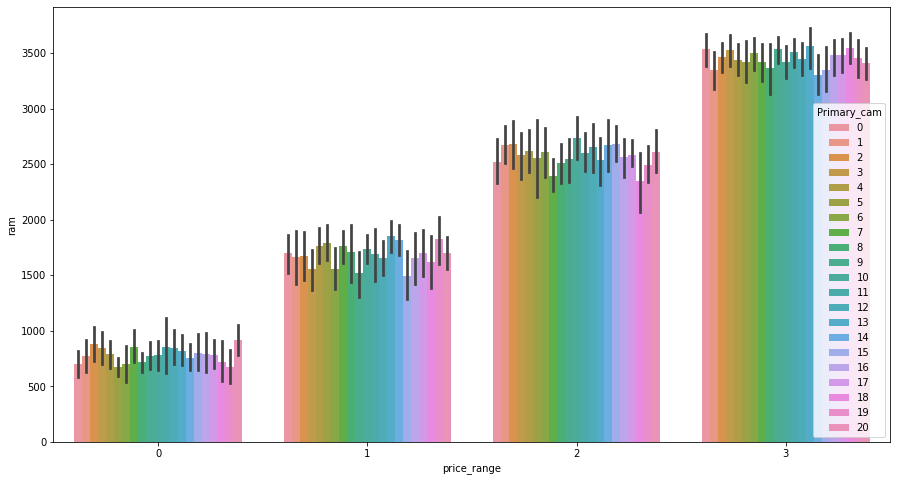

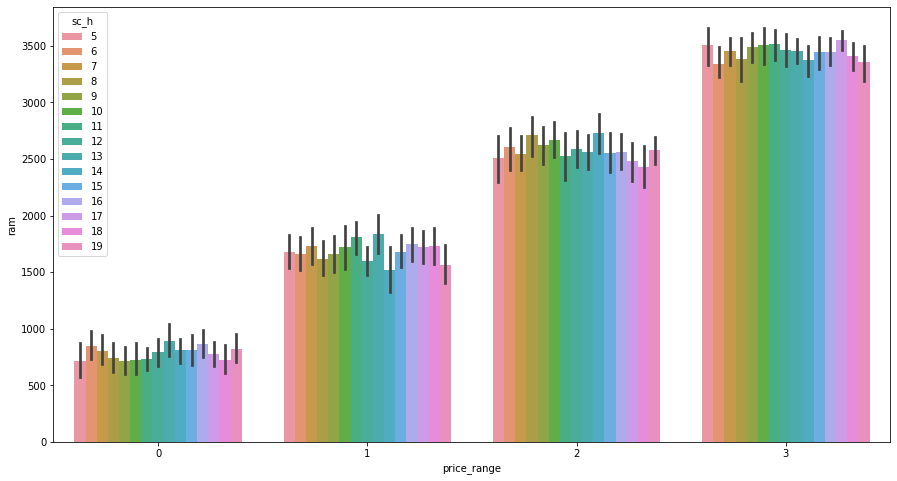

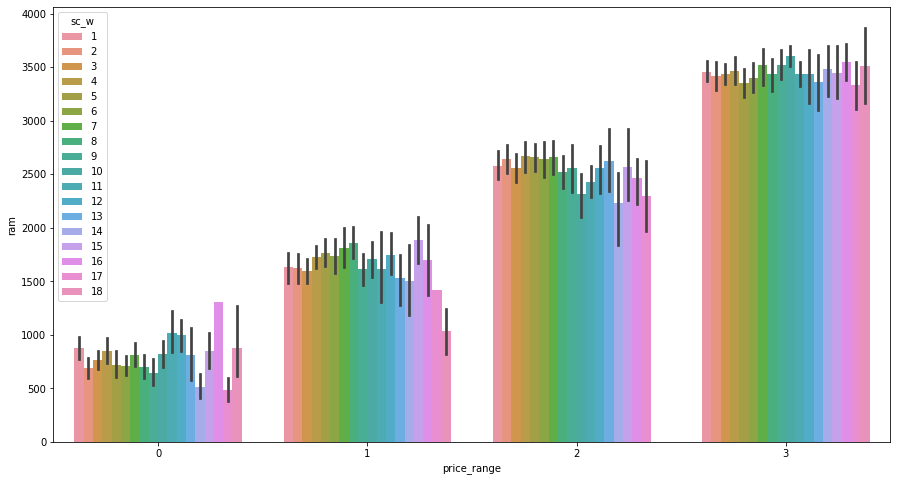

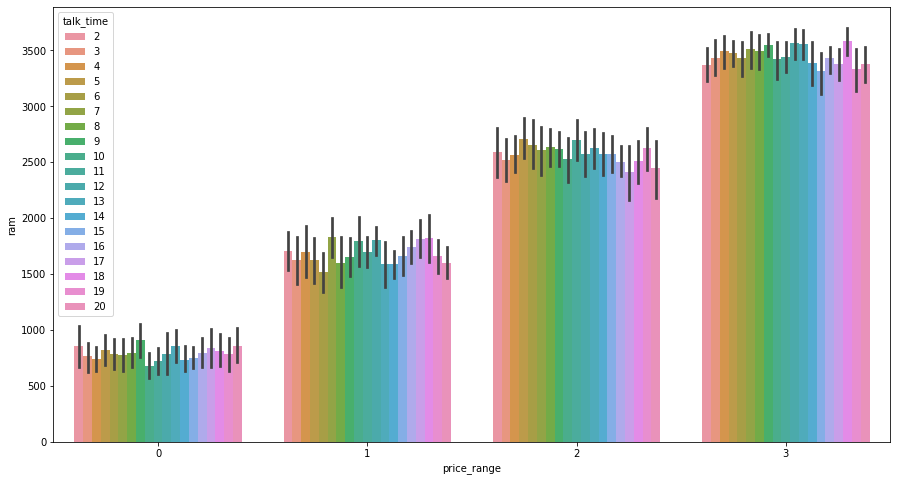

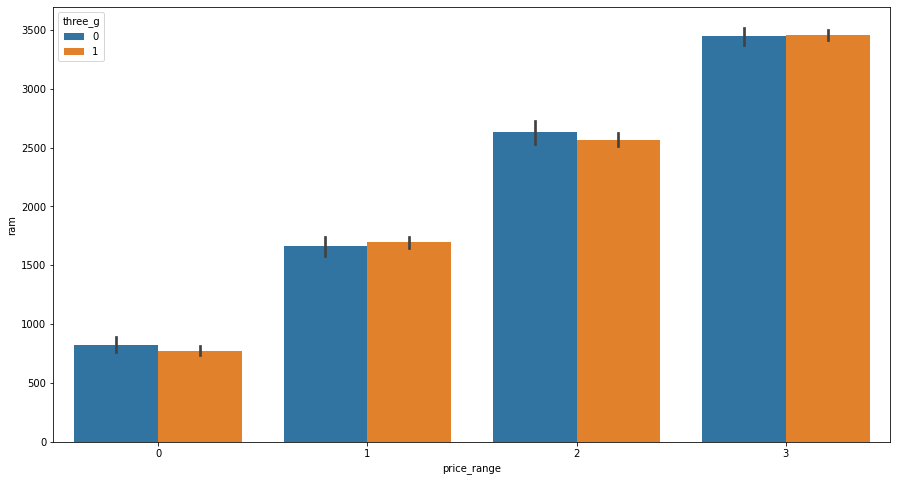

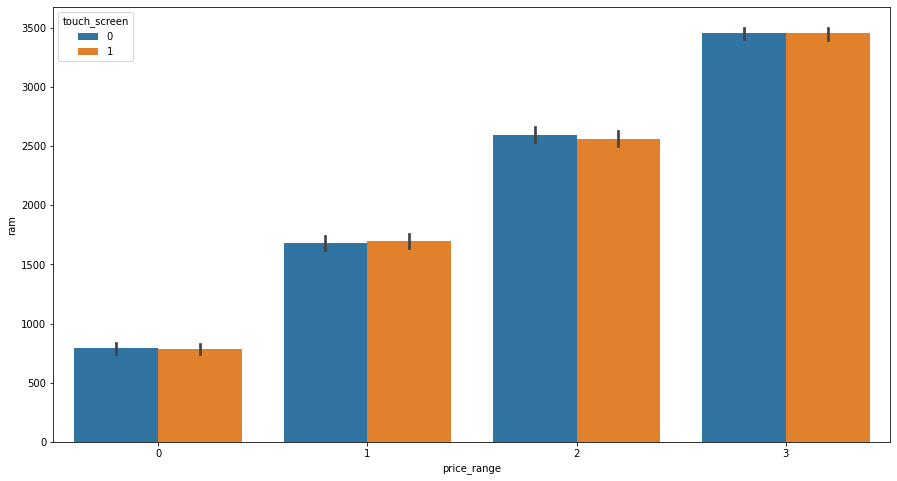

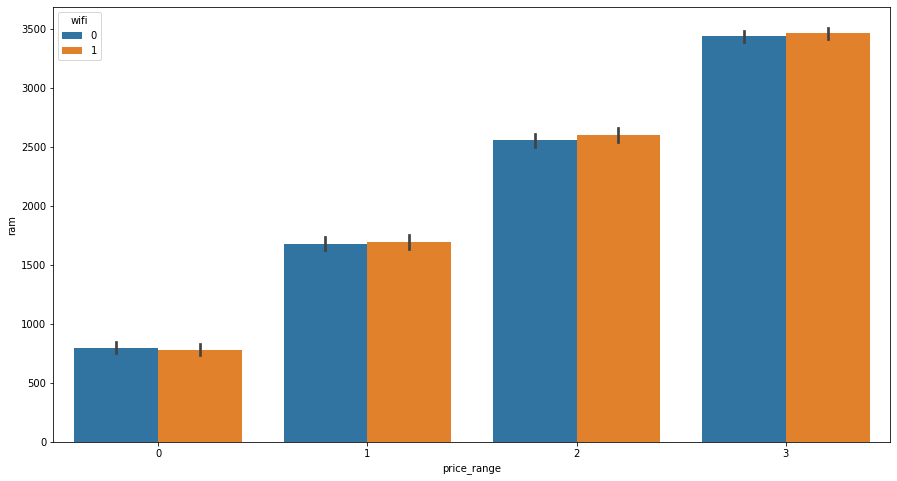

In [ ]:
for i in ['blue', 'clock_speed', 'dual_sim', 'Front_cam', 'four_g', 'm_dep', 'n_cores', 'Primary_cam','sc_h', 'sc_w', 'talk_time', 'three_g','touch_screen', 'wifi']:
  fig = plt.figure(figsize=(15,8))
  sns.barplot(x=mobile_df['price_range'],y=mobile_df['ram'],hue=mobile_df[i])
  plt.show()

#### Chart - 8

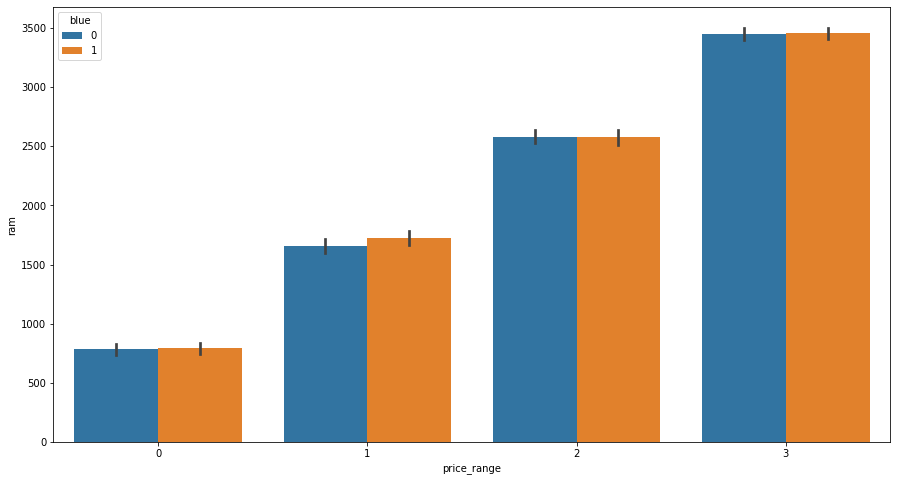

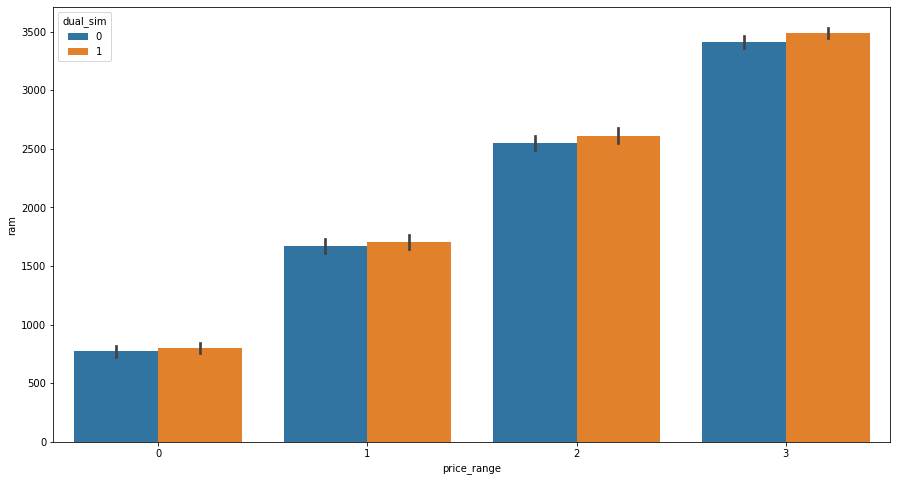

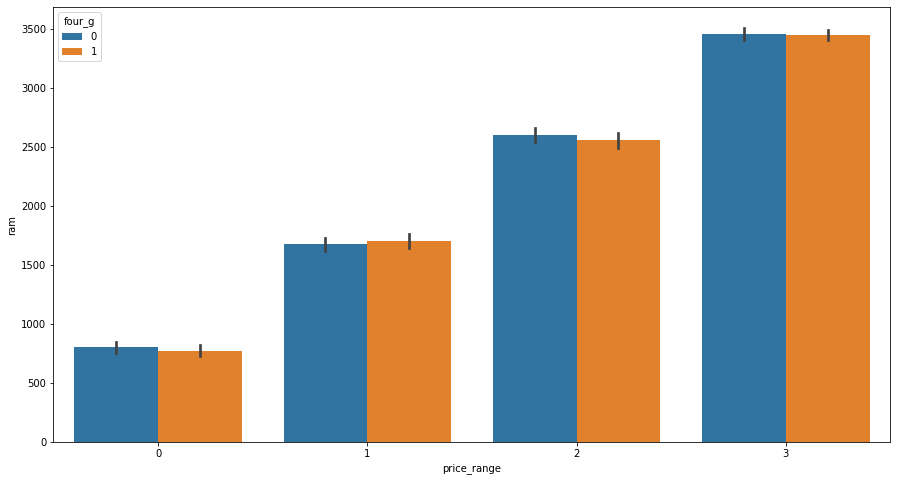

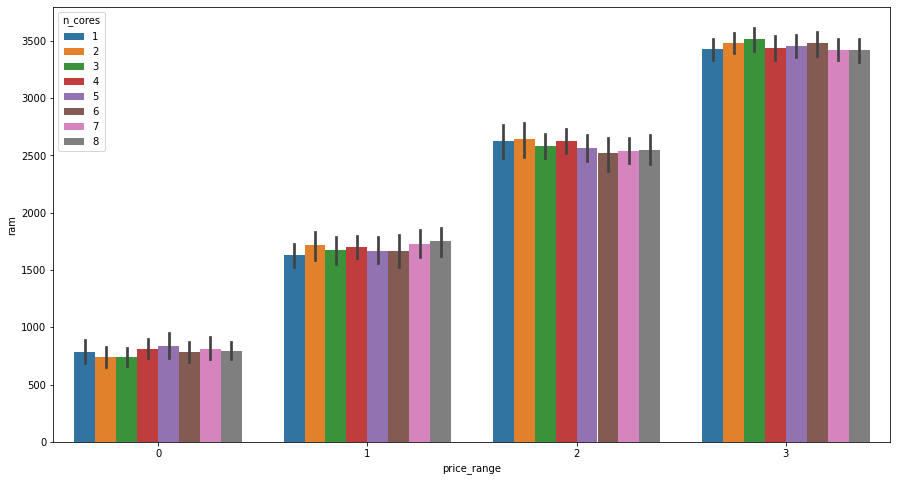

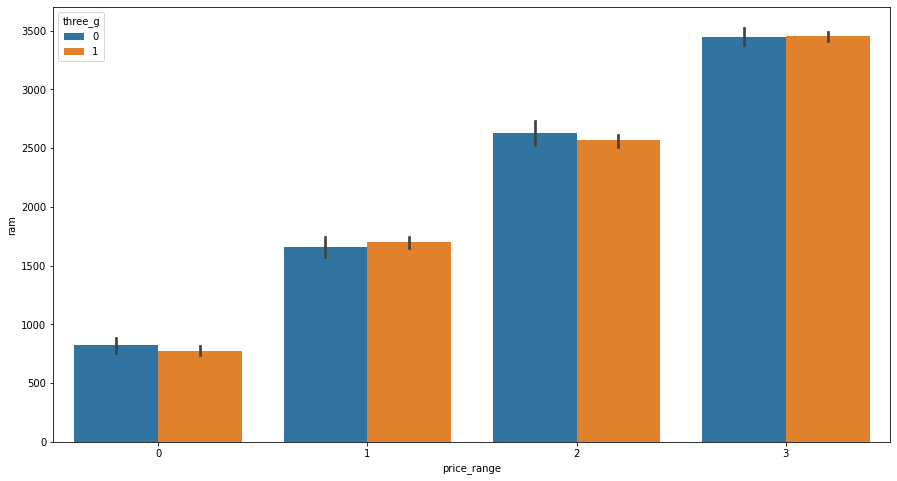

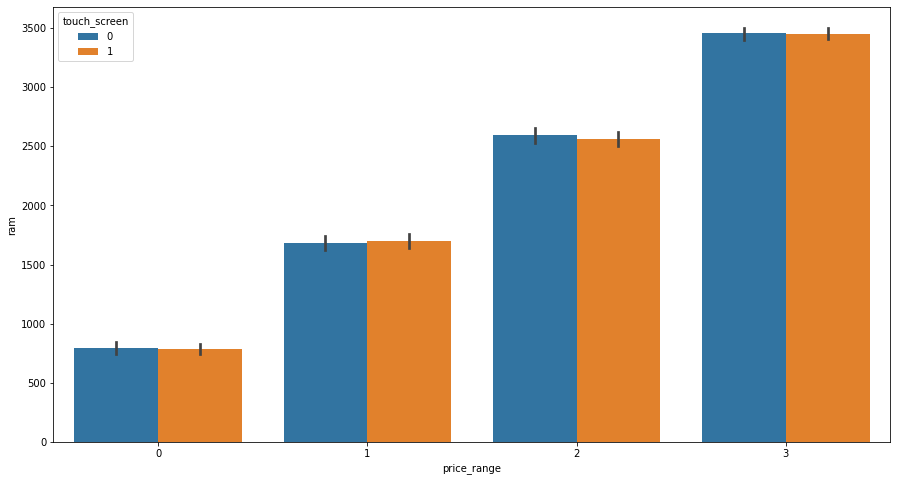

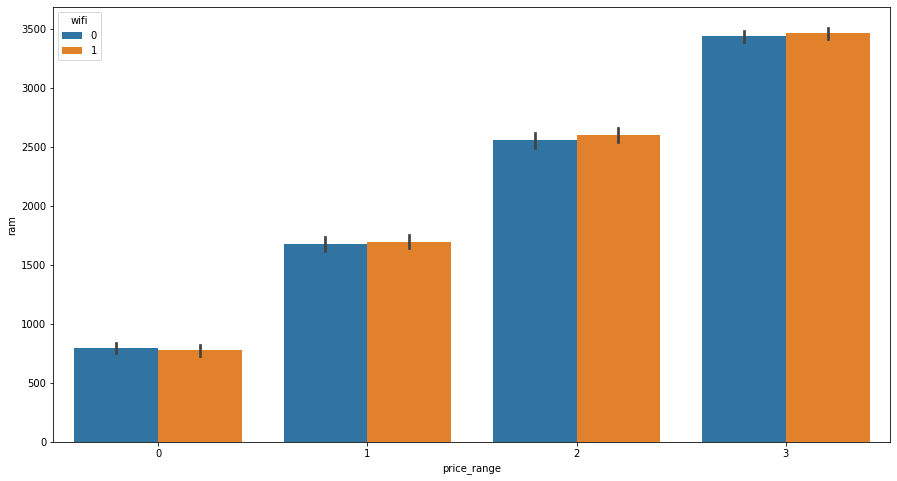

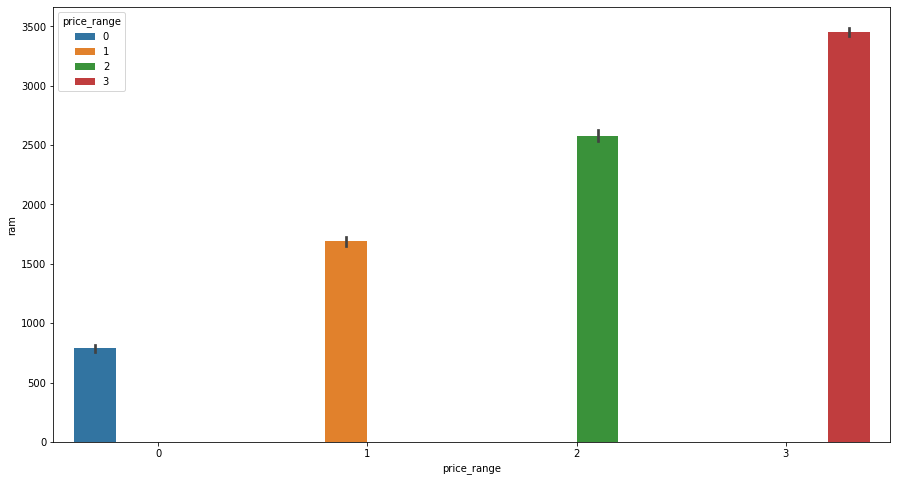

In [ ]:
for i in categorical_columns:
  fig = plt.figure(figsize=(15,8))
  sns.barplot(x=mobile_df['price_range'],y=mobile_df['ram'],hue=mobile_df[i])
  plt.show()

#### Chart - 9

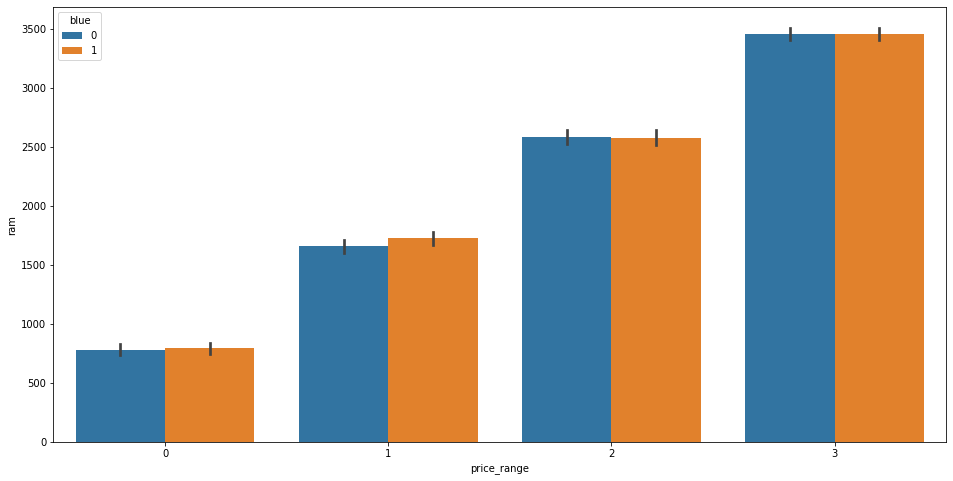

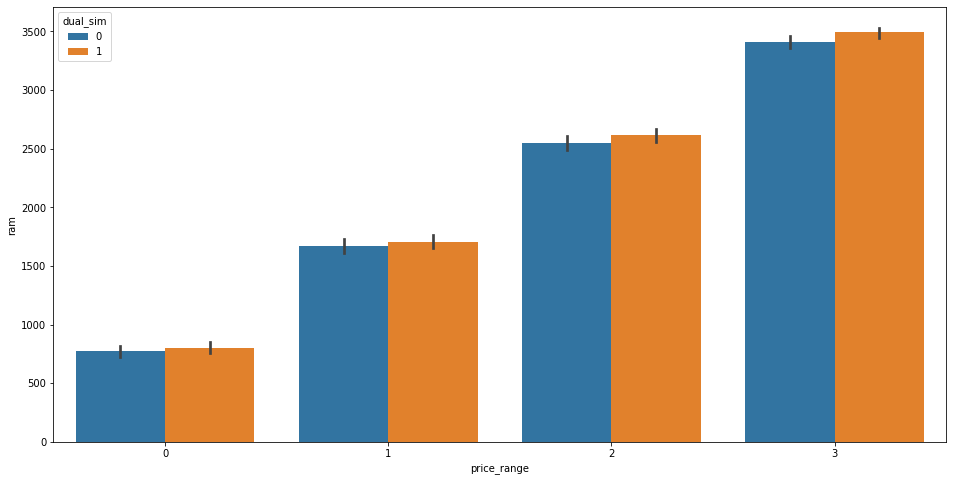

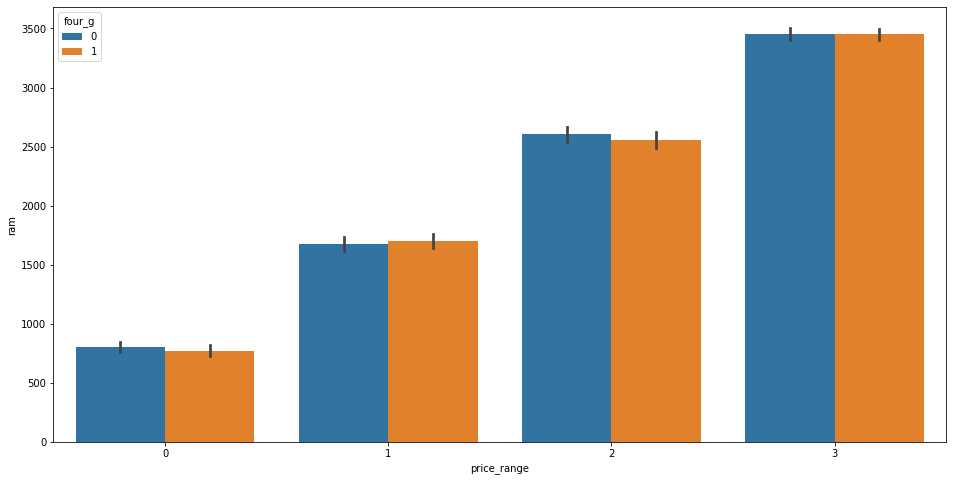

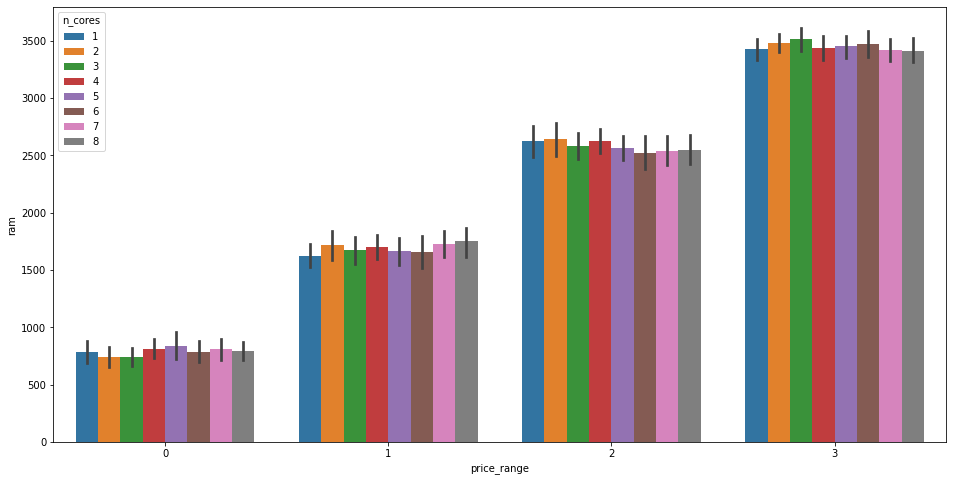

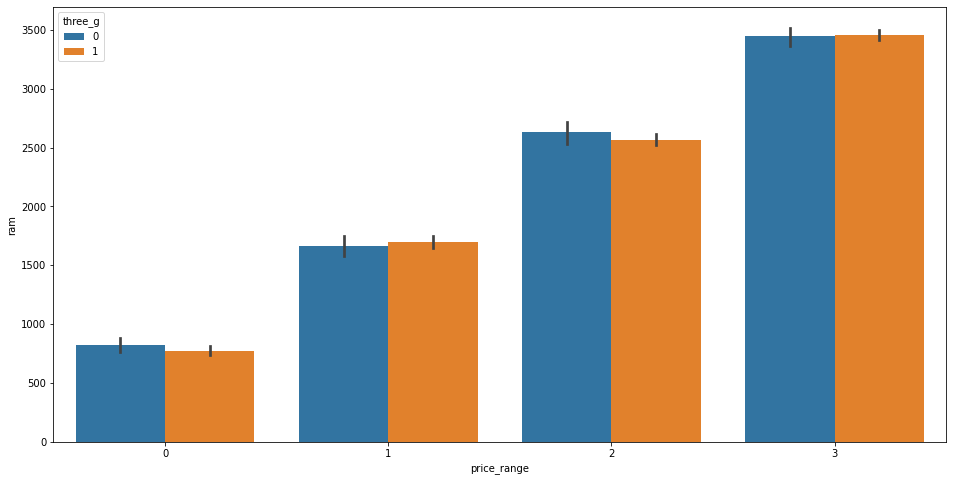

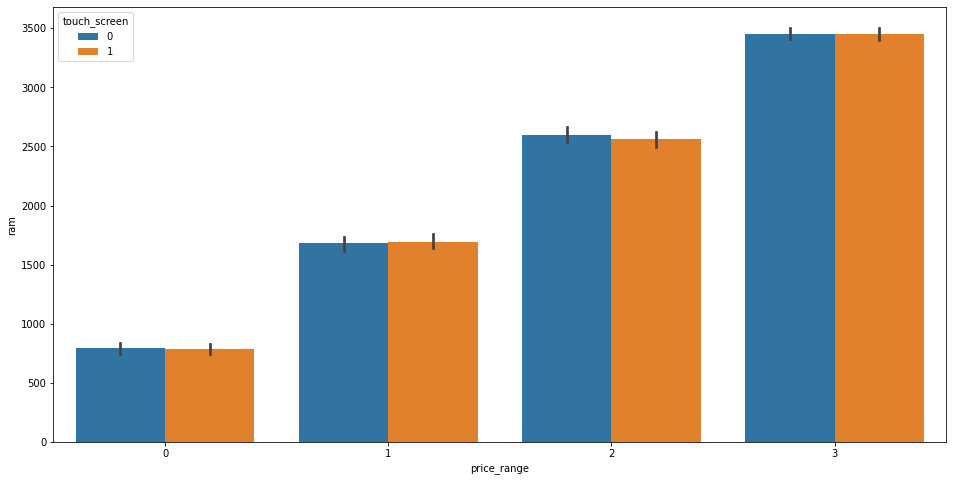

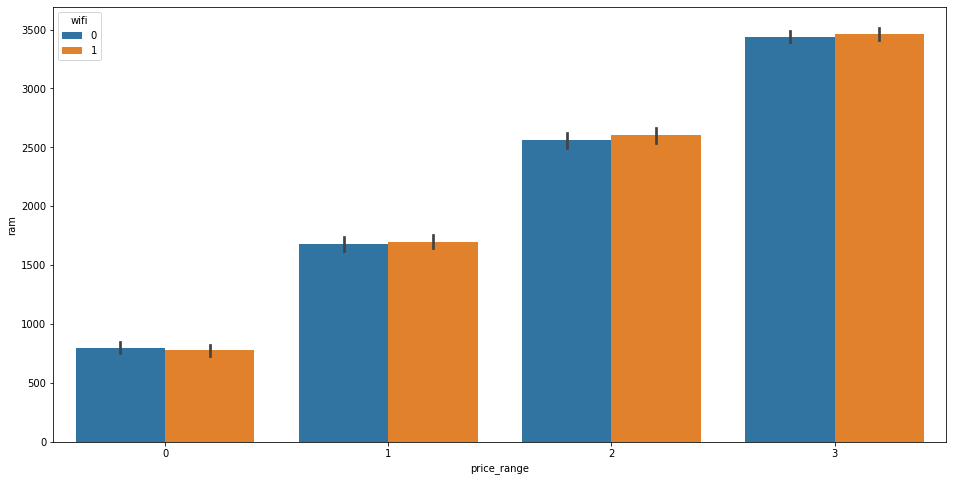

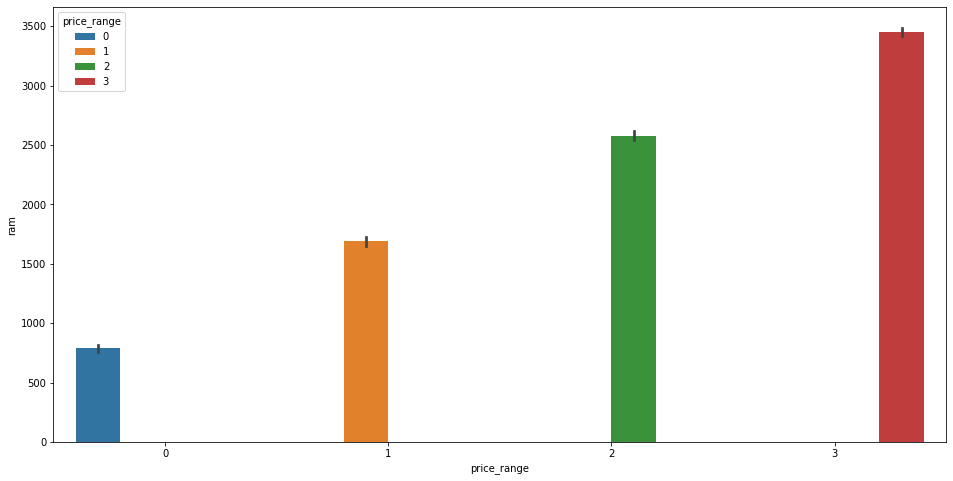

In [ ]:
for i in categorical_columns:
  fig = plt.figure(figsize=(16,8))
  sns.barplot(x=mobile_df['price_range'],y=mobile_df['ram'],hue=mobile_df[i])

#### Chart - 10

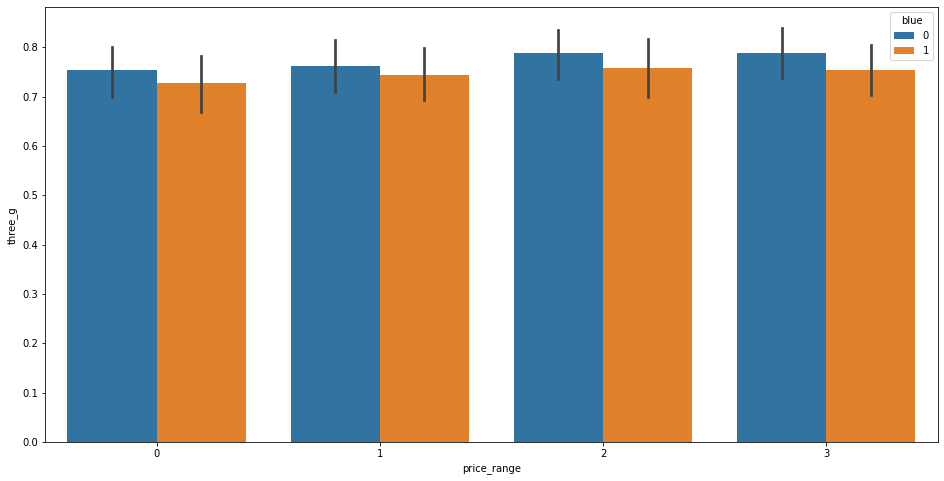

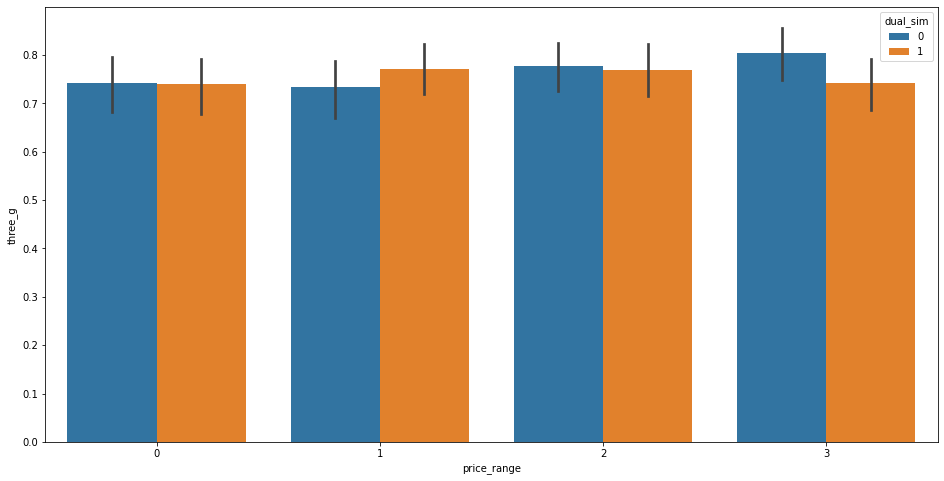

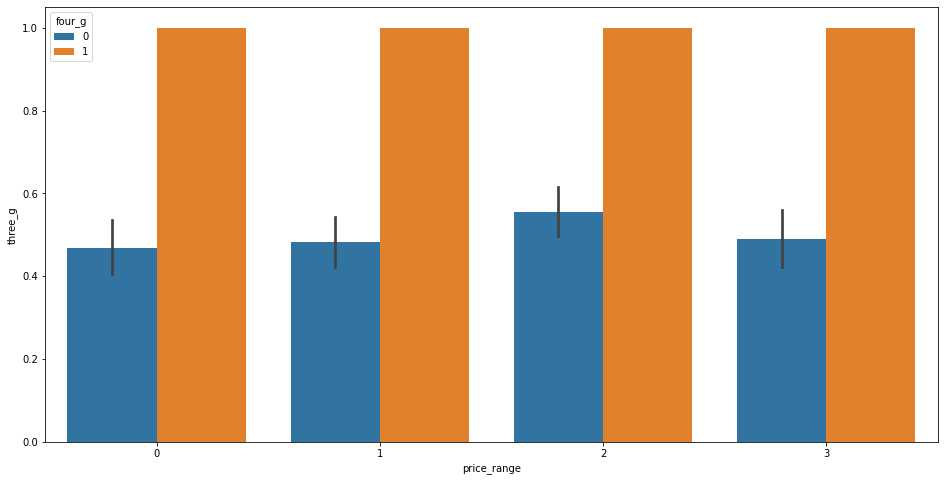

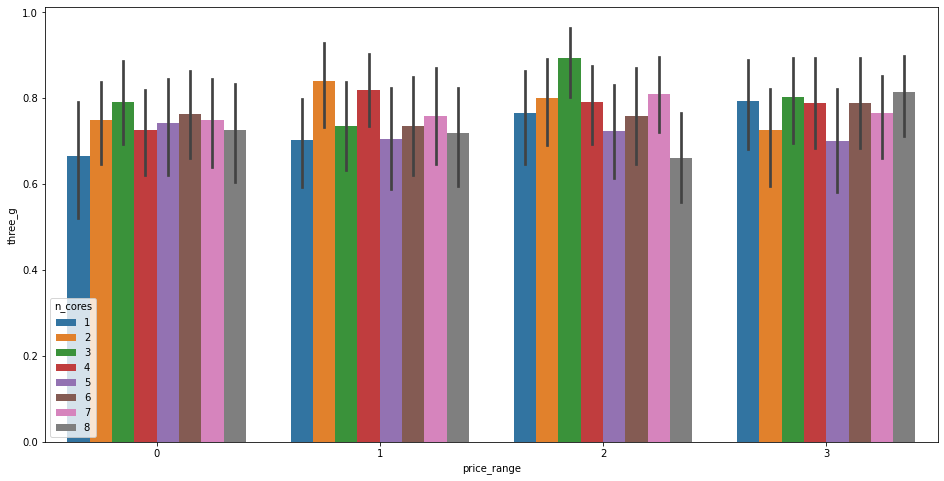

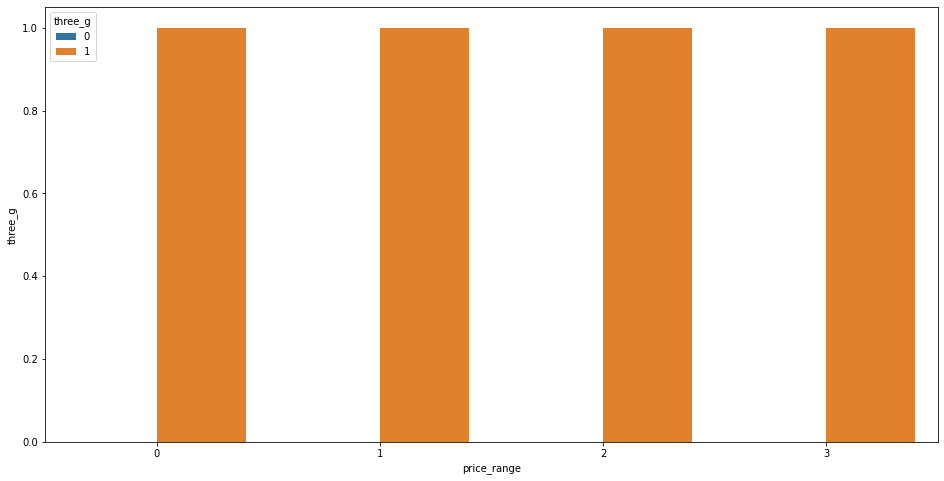

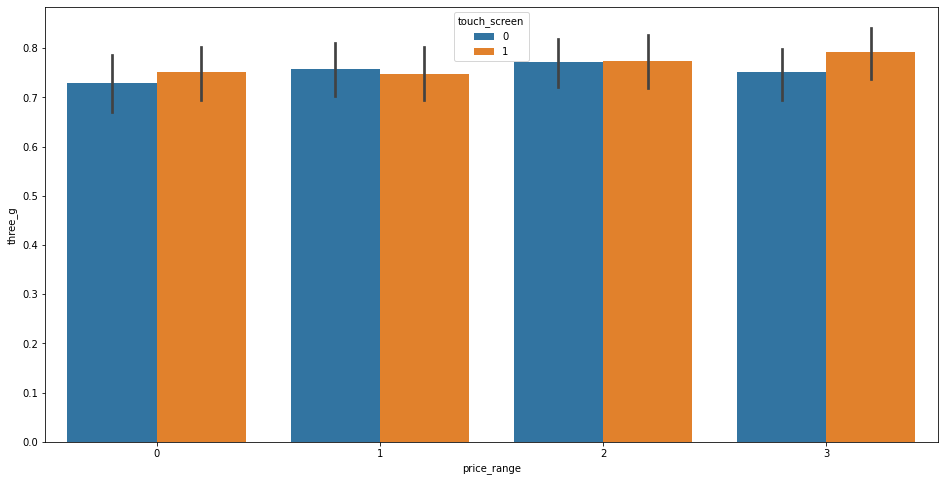

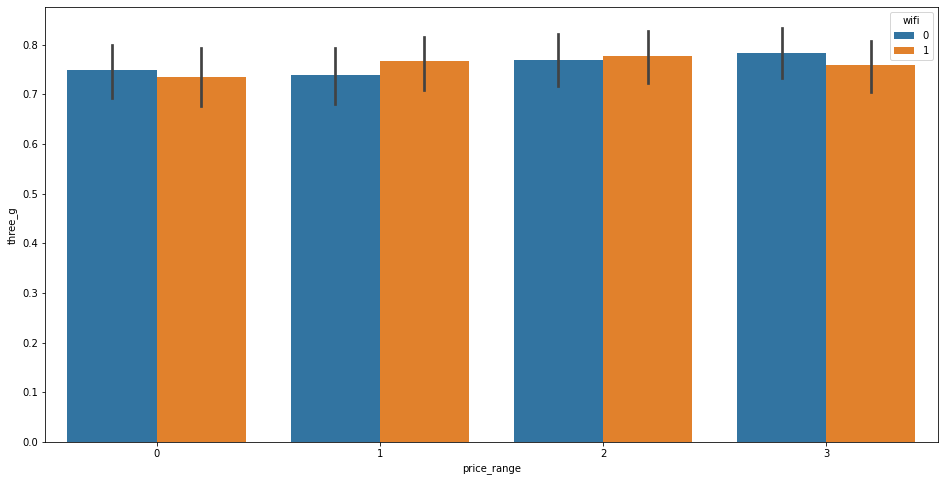

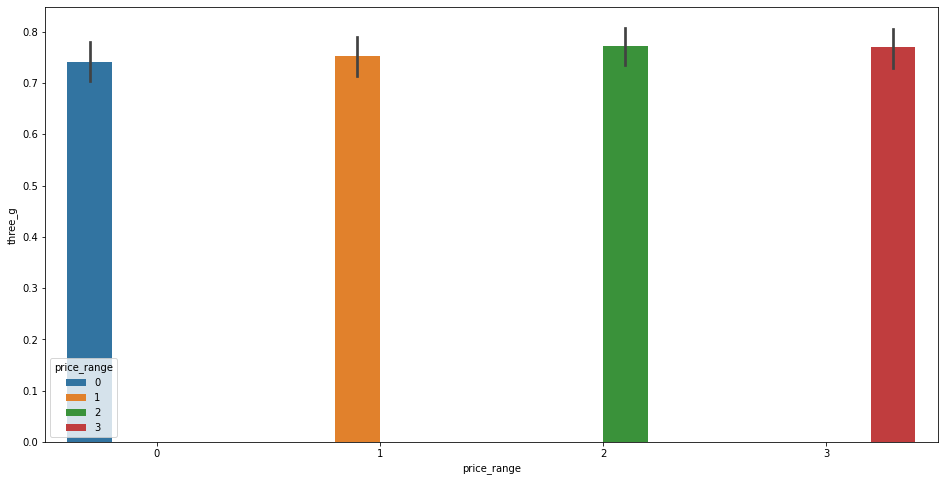

In [ ]:
for i in categorical_columns:
  fig = plt.figure(figsize=(16,8))
  sns.barplot(x=mobile_df['price_range'],y=mobile_df['three_g'],hue=mobile_df[i])

* Phone with all features

In [ ]:
#phones contain all features
mobile_df[(mobile_df['blue']==1)&(mobile_df['dual_sim']==1)&(mobile_df['Front_cam']==1)&(mobile_df['four_g']==1)&(mobile_df['three_g']==1)&(mobile_df['touch_screen']==1)&(mobile_df['wifi']==1)]

,mah,blue,clock_speed,dual_sim,Front_cam,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
208,664,1,1.1,1,1,1,51,0.1,110,7,...,701,1478,3629,19,15,6,1,1,1,3
628,1359,1,0.5,1,1,1,58,0.5,107,6,...,446,901,1076,16,8,4,1,1,1,0
998,1373,1,1.9,1,1,1,29,0.9,141,6,...,1220,1348,2752,15,2,7,1,1,1,3
1095,775,1,2.5,1,1,1,10,0.1,185,7,...,444,1555,1719,19,3,18,1,1,1,1
1287,860,1,1.3,1,1,1,49,0.7,141,6,...,692,979,3869,16,14,20,1,1,1,3
1430,1672,1,1.7,1,1,1,44,0.5,172,8,...,1250,1435,1348,11,6,7,1,1,1,1
1491,1130,1,0.5,1,1,1,29,0.7,130,1,...,593,1327,432,6,1,10,1,1,1,0
1562,911,1,2.2,1,1,1,28,0.5,182,2,...,157,763,2638,8,4,13,1,1,1,1
1595,832,1,0.5,1,1,1,5,0.1,165,5,...,9,1944,3946,12,5,14,1,1,1,3
1630,612,1,0.5,1,1,1,20,0.8,179,8,...,1145,1487,3282,16,2,18,1,1,1,3


* Phone without features

In [ ]:
#basic phones with no features

mobile_df[(mobile_df['blue']==0)&(mobile_df['dual_sim']==0)&(mobile_df['Front_cam']==0)&(mobile_df['four_g']==0)&(mobile_df['three_g']==0)&(mobile_df['touch_screen']==0)&(mobile_df['wifi']==0)]

,mah,blue,clock_speed,dual_sim,Front_cam,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
67,1866,0,1.4,0,0,0,30,0.5,182,3,...,108,1781,3834,16,11,8,0,0,0,3
158,1356,0,2.8,0,0,0,29,0.5,198,6,...,1612,1983,3702,17,10,19,0,0,0,3
251,1210,0,0.5,0,0,0,63,0.1,93,5,...,1177,1462,2394,17,9,7,0,0,0,2
311,1707,0,1.4,0,0,0,41,0.8,80,7,...,1331,1388,1774,12,4,10,0,0,0,2
406,1007,0,2.0,0,0,0,45,0.1,95,5,...,1186,1529,3648,9,11,16,0,0,0,3
488,1949,0,1.8,0,0,0,20,0.8,186,5,...,518,592,1125,17,10,9,0,0,0,1
640,600,0,0.5,0,0,0,14,0.8,112,5,...,320,747,1655,18,4,9,0,0,0,0
889,1829,0,1.7,0,0,0,36,0.8,112,5,...,291,563,1475,11,4,7,0,0,0,1
1958,1063,0,2.0,0,0,0,27,0.2,86,6,...,201,582,2668,12,5,19,0,0,0,2


#### Chart - 14 - Correlation Heatmap

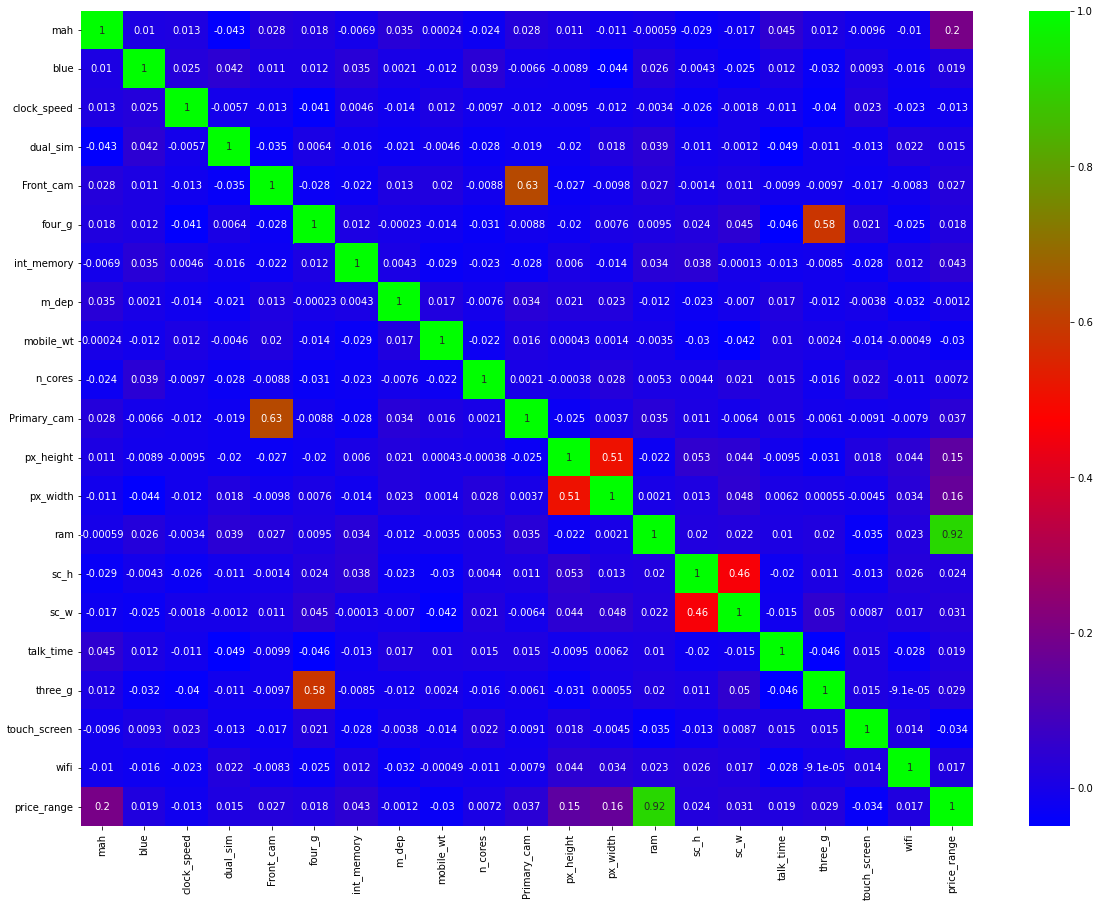

In [ ]:
fig = plt.figure(figsize=(20,15))
corr=mobile_df.corr()
sns.heatmap(corr,annot=True,cmap='brg')

## ***6. Feature Engineering & Data Pre-processing***

###  Data Splitting

In [ ]:
# create independent variables dataframe

x=mobile_df.drop('price_range',axis=1)

# create dependent variable series

y=mobile_df['price_range']

In [ ]:
# import seleck k best module from feature selection

from sklearn.feature_selection import SelectKBest

# import chi square module from feature selection

from sklearn.feature_selection import chi2

In [ ]:
# select top features

topfeatures = SelectKBest(score_func=chi2, k=15)

fit_top_features = topfeatures.fit(x,y)

In [ ]:
# create dataframe of top features

dfscores = pd.DataFrame(fit_top_features.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [ ]:
# concatinate feature score dataframe

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']

In [ ]:
featureScores

,Feature,Score
0,mah,13505.022467
1,blue,0.531374
2,clock_speed,0.823457
3,dual_sim,0.678041
4,Front_cam,10.834975
5,four_g,1.698998
6,int_memory,79.957546
7,m_dep,0.749824
8,mobile_wt,93.737357
9,n_cores,8.379480


In [ ]:
print(featureScores.nlargest(15,'Score'))

         Feature          Score
13           ram  909561.357223
11     px_height   15908.164022
0            mah   13505.022467
12      px_width    9079.507773
8      mobile_wt      93.737357
6     int_memory      79.957546
16     talk_time      12.131473
4      Front_cam      10.834975
10   Primary_cam      10.221820
14          sc_h       9.168885
9        n_cores       8.379480
15          sc_w       8.374349
18  touch_screen       1.884086
5         four_g       1.698998
2    clock_speed       0.823457


In [ ]:
# select top 15 features to train the data

x=mobile_df[['ram','px_height','mah','px_width','mobile_wt','int_memory','talk_time','Front_cam','Primary_cam','sc_h','n_cores','sc_w','touch_screen','four_g','clock_speed']]
y=mobile_df['price_range']

### Train Teat split

In [ ]:
# split the data into test and train part 

# import train test split from model selection

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.20, random_state=1)
     

In [ ]:
# print the shape of the split

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1563, 15)
(391, 15)
(1563,)
(391,)


### Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

## ***7. ML Model Implementation***

### ML Model - 1 - Logistic Regression


In [ ]:
# import Logistic Regression

from sklearn.linear_model import LogisticRegression

# create object of logistic regression

lr=LogisticRegression(random_state=1)

# fit the training data on logistic regression

lr.fit(x_train,y_train)

# predict on training data

y_train_pred=lr.predict(x_train)

# predict on test data

y_pred=lr.predict(x_test)

In [ ]:
# import accuracy score from metrics

from sklearn.metrics import accuracy_score

# check accuracy score on traing data

lr_tr=accuracy_score(y_train,y_train_pred)
lr_tr

0.9756877799104287

In [ ]:
# check accuracy score on test data

lr_ts=accuracy_score(y_test,y_pred)
lr_ts

0.9667519181585678

In [ ]:
from sklearn.metrics import classification_report

print("classification report on traing data")
print(classification_report(y_train,y_train_pred))
print('-----------------------------------------------------')
print("classification report on test data")
print(classification_report(y_test,y_pred))

classification report on traing data
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       389
           1       0.97      0.96      0.97       375
           2       0.98      0.95      0.97       400
           3       0.98      0.99      0.99       399

    accuracy                           0.98      1563
   macro avg       0.98      0.98      0.98      1563
weighted avg       0.98      0.98      0.98      1563

-----------------------------------------------------
classification report on test data
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       102
           1       0.96      0.95      0.96       110
           2       0.93      0.96      0.94        89
           3       0.98      0.98      0.98        90

    accuracy                           0.97       391
   macro avg       0.97      0.97      0.97       391
weighted avg       0.97      0.97      0.97       391



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

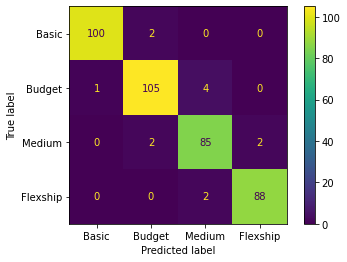

In [ ]:
# import confusion matxic plot

from sklearn.metrics import plot_confusion_matrix

# plot confusion matrix

plot_confusion_matrix(lr ,x_test,y_test,display_labels=['Basic','Budget', 'Medium', 'Flexship'])

*  Linear Regression accuracy on trsining data is 97.5%

*  On test data the accuracy is 96%

### ML Model - 2 - Decision tree

In [ ]:
# import decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# create object of Decision tree

dt=DecisionTreeClassifier(random_state=1)

# fit the training data on logistic regression

dt.fit(x_train,y_train)

# predict on training data

y_train_pred=dt.predict(x_train)

# predict on test data

y_pred=dt.predict(x_test)

In [ ]:
# check accuracy score on traing data

dt_tr=accuracy_score(y_train,y_train_pred)

In [ ]:
# check accuracy score on test data

dt_ts=accuracy_score(y_test,y_pred)

In [ ]:
# print classificaton report

print("classification report on traing data")
print(classification_report(y_train,y_train_pred))
print('-----------------------------------------------------')
print("classification report on test data")
print(classification_report(y_test,y_pred))

classification report on traing data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       375
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       399

    accuracy                           1.00      1563
   macro avg       1.00      1.00      1.00      1563
weighted avg       1.00      1.00      1.00      1563

-----------------------------------------------------
classification report on test data
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       102
           1       0.83      0.73      0.78       110
           2       0.74      0.79      0.76        89
           3       0.90      0.93      0.92        90

    accuracy                           0.84       391
   macro avg       0.84      0.85      0.84       391
weighted avg       0.84      0.84      0.84       391



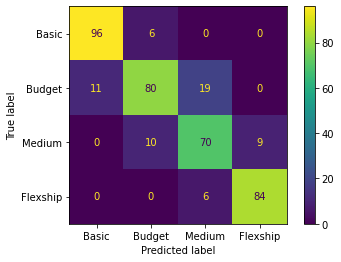

In [ ]:
# plot confusion matrix

plot_confusion_matrix(dt ,x_test,y_test,display_labels=['Basic','Budget', 'Medium', 'Flexship'])

#### **Decision Tree Hyperparameter Tuning**

In [ ]:
# paramter grid values for hyperparameter tunning.

grid_values={'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,7,8,9,10,11,12],
             'splitter':['best','random'],
             'min_samples_split':[3,5,7,9],
             'max_features':['auto','sqrt','log2',None]}

In [ ]:
# import GridSearchCv from model selection

from sklearn.model_selection import GridSearchCV

# apply grid search cv on decision tree

dt_tune=GridSearchCV(dt,param_grid=grid_values,cv=5,scoring='accuracy',verbose=3)

# fit the model 

dt_tune.fit(x_train,y_train)

Fitting 5 folds for each of 704 candidates, totalling 3520 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.486 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.460 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.498 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.503 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.478 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.278 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.288 total time=   0.0s
[CV 3/5] END criterion=gini, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 7, 9],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [ ]:
# Getting best parameters

dt_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': None,
 'min_samples_split': 3,
 'splitter': 'best'}

In [ ]:
# create decision tree object with best parameters

dt_best=DecisionTreeClassifier(criterion='entropy',max_depth= 8,max_features= None,min_samples_split= 3,splitter= 'best')

# fit the model

dt_best.fit(x_train,y_train)

# predict on training data

y_train_pred=dt_best.predict(x_train)

# predict on test data

y_pred=dt_best.predict(x_test)

In [ ]:
# check accuracy score on training data

dt_tr_h=accuracy_score(y_train,y_train_pred)

# check accuracy score on test data

dt_ts_h=accuracy_score(y_test,y_pred)

In [ ]:
# print classificaton report

print("classification report on traing data")
print(classification_report(y_train,y_train_pred))
print('-----------------------------------------------------')
print("classification report on test data")
print(classification_report(y_test,y_pred))

classification report on traing data
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       389
           1       0.96      0.98      0.97       375
           2       0.99      0.95      0.97       400
           3       0.99      0.99      0.99       399

    accuracy                           0.98      1563
   macro avg       0.98      0.98      0.98      1563
weighted avg       0.98      0.98      0.98      1563

-----------------------------------------------------
classification report on test data
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       102
           1       0.82      0.85      0.83       110
           2       0.80      0.81      0.80        89
           3       0.92      0.88      0.90        90

    accuracy                           0.86       391
   macro avg       0.86      0.86      0.86       391
weighted avg       0.86      0.86      0.86       391



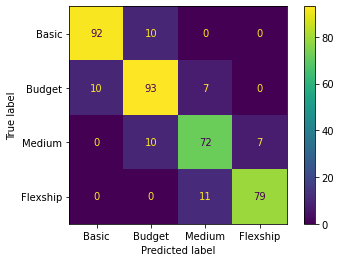

In [ ]:
# plot confusion matrix

plot_confusion_matrix(dt_best ,x_test,y_test,display_labels=['Basic','Budget', 'Medium', 'Flexship'])

### ML Model - 3 - RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)

In [ ]:
clsr.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
y_pred = clsr.predict(x_test)

In [ ]:
clsr_tr = accuracy_score(y_test, y_pred)

In [ ]:
# print classificaton report

print("classification report on traing data")
print(classification_report(y_train,y_train_pred))
print('-----------------------------------------------------')
print("classification report on test data")
print(classification_report(y_test,y_pred))

classification report on traing data
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       389
           1       0.96      0.98      0.97       375
           2       0.99      0.95      0.97       400
           3       0.99      0.99      0.99       399

    accuracy                           0.98      1563
   macro avg       0.98      0.98      0.98      1563
weighted avg       0.98      0.98      0.98      1563

-----------------------------------------------------
classification report on test data
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       102
           1       0.86      0.85      0.85       110
           2       0.89      0.82      0.85        89
           3       0.94      0.97      0.95        90

    accuracy                           0.90       391
   macro avg       0.90      0.90      0.90       391
weighted avg       0.89      0.90      0.89       391



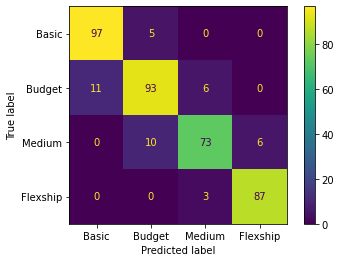

In [ ]:
# plot confusion matrix

plot_confusion_matrix(clsr ,x_test,y_test,display_labels=['Basic','Budget', 'Medium', 'Flexship'])

#### 2. Random Forest & Hyperparameter Tuning

In [ ]:
# para_grid values to pass in gridsearchcv

grid_values={'criterion':['entropy','gini'],
          'max_features':['log2','sqrt'],
          'n_estimators':[500, 600, 700],
          'max_depth':[None, 10],
          'min_samples_split':[5,8],
          'max_leaf_nodes':[None],
           }

In [ ]:
# apply gris search cv on random forest 

clsrc_tune=GridSearchCV(clsr,param_grid=grid_values,cv=3,verbose=3,scoring='accuracy')

# fit the model

clsrc_tune.fit(x_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END criterion=entropy, max_depth=None, max_features=log2, max_leaf_nodes=None, min_samples_split=5, n_estimators=500;, score=0.881 total time=   1.7s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=log2, max_leaf_nodes=None, min_samples_split=5, n_estimators=500;, score=0.868 total time=   1.7s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=log2, max_leaf_nodes=None, min_samples_split=5, n_estimators=500;, score=0.894 total time=   1.6s
[CV 1/3] END criterion=entropy, max_depth=None, max_features=log2, max_leaf_nodes=None, min_samples_split=5, n_estimators=600;, score=0.883 total time=   3.0s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=log2, max_leaf_nodes=None, min_samples_split=5, n_estimators=600;, score=0.868 total time=   2.4s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=log2, max_leaf_nodes=None, min_samples_split=5, n_estimators=600;, score=0.887 tot

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=300),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 10],
                         'max_features': ['log2', 'sqrt'],
                         'max_leaf_nodes': [None], 'min_samples_split': [5, 8],
                         'n_estimators': [500, 600, 700]},
             scoring='accuracy', verbose=3)

In [ ]:
# getting best parameters

clsrc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_samples_split': 5,
 'n_estimators': 500}

In [ ]:
# create object of random forest with best [parameters]

clsr_best=RandomForestClassifier(criterion='entropy',max_depth=None,max_features='log2',max_leaf_nodes=None,min_samples_split=5,n_estimators=600)

# fit the model

clsr_best.fit(x_train,y_train)

# predict on training data

y_train_pred=clsr_best.predict(x_train)

# predict on test data

y_pred=clsr_best.predict(x_test)

In [ ]:
# check accuracy on traing data

clsr_tr_h=accuracy_score(y_train,y_train_pred)

In [ ]:
# check accuracy on test data

clsr_ts_h=accuracy_score(y_test,y_pred)

In [ ]:
# print classificaton report

print("classification report on traing data")
print(classification_report(y_train,y_train_pred))
print('-----------------------------------------------------')
print("classification report on test data")
print(classification_report(y_test,y_pred))

classification report on traing data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       375
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       399

    accuracy                           1.00      1563
   macro avg       1.00      1.00      1.00      1563
weighted avg       1.00      1.00      1.00      1563

-----------------------------------------------------
classification report on test data
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       102
           1       0.88      0.86      0.87       110
           2       0.88      0.84      0.86        89
           3       0.94      0.94      0.94        90

    accuracy                           0.90       391
   macro avg       0.90      0.90      0.90       391
weighted avg       0.90      0.90      0.90       391



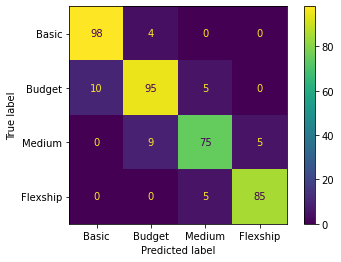

In [ ]:
# plot confusion matrix

plot_confusion_matrix(clsr_best ,x_test,y_test,display_labels=['Basic','Budget', 'Medium', 'Flexship'])

# Model - 4 - XGboost

In [ ]:
# import xgb classifier from xgboost

from xgboost import XGBClassifier

# create object of xgboost

xgb=XGBClassifier()

#fit the model on training data

xgb.fit(x_train,y_train)

# predict on training data

y_train_pred=xgb.predict(x_train)

# predict on test data

y_pred=xgb.predict(x_test)

In [ ]:
# check accuracy on traing data

xgb_tr=accuracy_score(y_train,y_train_pred)

# check accuracy on test data

xgb_ts=accuracy_score(y_test,y_pred)

In [ ]:
# print classificaton report

print("classification report on traing data")
print(classification_report(y_train,y_train_pred))
print('-----------------------------------------------------')
print("classification report on test data")
print(classification_report(y_test,y_pred))

classification report on traing data
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       389
           1       0.98      0.99      0.99       375
           2       0.99      0.97      0.98       400
           3       0.99      0.99      0.99       399

    accuracy                           0.99      1563
   macro avg       0.99      0.99      0.99      1563
weighted avg       0.99      0.99      0.99      1563

-----------------------------------------------------
classification report on test data
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       102
           1       0.88      0.89      0.88       110
           2       0.87      0.87      0.87        89
           3       0.97      0.93      0.95        90

    accuracy                           0.91       391
   macro avg       0.91      0.91      0.91       391
weighted avg       0.91      0.91      0.91       391



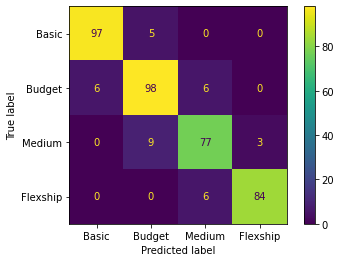

In [ ]:
# plot confusion matrix

plot_confusion_matrix(xgb ,x_test,y_test,display_labels=['Basic','Budget', 'Medium', 'Flexship'])

In [ ]:
# parameter grid values for GridSearchCv 

grid_values={
          'learning_rate':[0.6,1],
          'n_estimators':[500,1000],
          'gamma':[0.2],
          'subsample':[0.5,0.6]}

In [ ]:
# applying girdsearchcv 

xgb_tune = GridSearchCV(xgb, grid_values, cv=3,verbose=4)

# fit the model

xgb_tune.fit(x_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.898 total time=   1.9s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.887 total time=   1.7s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.910 total time=   1.7s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.906 total time=   1.7s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.891 total time=   1.7s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.908 total time=   1.8s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.898 total time=   4.6s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.883 total time=   3.3s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.

In [ ]:
# getting best parameters

xgb_tune.best_params_

In [ ]:
# apply best parameters 

xgb_best=XGBClassifier(learning_rate=0.6,gamma=0.2,n_estimators=1000,subsample=0.6)

# fit the model

xgb_best.fit(x_train,y_train)

In [ ]:
# check the accuracy on training dataset

xgb_tr_h=accuracy_score(y_train,y_train_pred)

# check the accuracy on test data

xgb_ts_h=accuracy_score(y_test,y_pred)

In [ ]:
# print classificaton report

print("classification report on traing data")
print(classification_report(y_train,y_train_pred))
print('-----------------------------------------------------')
print("classification report on test data")
print(classification_report(y_test,y_pred))

In [ ]:
# plot confusion matrix

plot_confusion_matrix(xgb_best ,x_test,y_test,display_labels=['Basic','Budget', 'Medium', 'Flexship'])

# Model - 4 - support vector machine

In [ ]:
# import support vector machine

from sklearn.svm import SVC 

# create object of the svc

svc=SVC(random_state=101)

# fit the model on traing data

svc.fit(x_train,y_train)

# predict on training data

y_train_pred=svc.predict(x_train)

# predict on test data

y_pred=svc.predict(x_test)

In [ ]:
# check accuracy on training data

svc_tr=accuracy_score(y_train,y_train_pred)

# check accuracy on test data

svc_ts=accuracy_score(y_test,y_pred)

In [ ]:
# print classificaton report

print("classification report on traing data")
print(classification_report(y_train,y_train_pred))
print('-----------------------------------------------------')
print("classification report on test data")
print(classification_report(y_test,y_pred))

classification report on traing data
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       389
           1       0.97      0.97      0.97       375
           2       0.96      0.97      0.96       400
           3       0.99      0.98      0.99       399

    accuracy                           0.98      1563
   macro avg       0.98      0.98      0.98      1563
weighted avg       0.98      0.98      0.98      1563

-----------------------------------------------------
classification report on test data
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       102
           1       0.85      0.85      0.85       110
           2       0.82      0.81      0.81        89
           3       0.92      0.91      0.92        90

    accuracy                           0.88       391
   macro avg       0.88      0.88      0.88       391
weighted avg       0.88      0.88      0.88       391



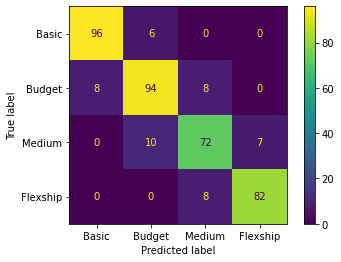

In [ ]:
# plot confusion matrix

plot_confusion_matrix(svc ,x_test,y_test,display_labels=['Basic','Budget', 'Medium', 'Flexship'])

#### SVM hyperparameter

In [ ]:
# parameter grid for GridSearchCv
grid_values = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]}

In [ ]:
# Hyperparameter tuning with the GrdiSearhCV with cv=5

svm_cv = GridSearchCV(svc, grid_values, cv = 5,verbose=2)
svm_cv.fit(x_train,y_train) 

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ...........C=0.01, degree=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ...........C=0.01, degree=1, gamma=0.

GridSearchCV(cv=5, estimator=SVC(random_state=101),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                         'gamma': [0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [ ]:
svm_cv.best_params_

{'C': 10, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}

In [ ]:
svc_best=SVC(C=10,degree=1,gamma=0.01,kernel='linear')
svc_best.fit(x_train,y_train)

SVC(C=10, degree=1, gamma=0.01, kernel='linear')

In [ ]:
svm_tr_h=accuracy_score(y_train,y_train_pred)

In [ ]:
svm_ts_h=accuracy_score(y_test,y_pred)

In [ ]:
# print classificaton report

print("classification report on traing data")
print(classification_report(y_train,y_train_pred))
print('-----------------------------------------------------')
print("classification report on test data")
print(classification_report(y_test,y_pred))

classification report on traing data
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       389
           1       0.97      0.97      0.97       375
           2       0.96      0.97      0.96       400
           3       0.99      0.98      0.99       399

    accuracy                           0.98      1563
   macro avg       0.98      0.98      0.98      1563
weighted avg       0.98      0.98      0.98      1563

-----------------------------------------------------
classification report on test data
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       102
           1       0.85      0.85      0.85       110
           2       0.82      0.81      0.81        89
           3       0.92      0.91      0.92        90

    accuracy                           0.88       391
   macro avg       0.88      0.88      0.88       391
weighted avg       0.88      0.88      0.88       391



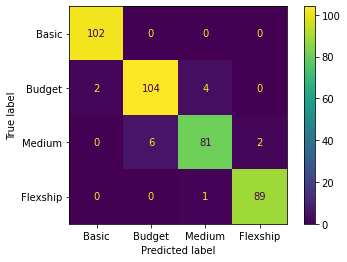

In [ ]:
plot_confusion_matrix(svc_best ,x_test,y_test,display_labels=['Basic','Budget', 'Medium', 'Flexship'])

# Model - 5 - gradiant Boosting

In [ ]:
# import gradient boosting from ensemble

from sklearn.ensemble import GradientBoostingClassifier

# create object of gradient boosting 

gbc=GradientBoostingClassifier(random_state=1)

# fit the training data on Random Forest

gbc.fit(x_train,y_train)

# predict on training data

y_train_pred=gbc.predict(x_train)

# predict on test data

y_pred=gbc.predict(x_test)

In [ ]:
# check accuracy on traing data

gbc_tr=accuracy_score(y_train,y_train_pred)
     

# check accuracy on test data

gbc_ts=accuracy_score(y_test,y_pred)

In [ ]:
# print classificaton report

print("classification report on traing data")
print(classification_report(y_train,y_train_pred))
print('-----------------------------------------------------')
print("classification report on test data")
print(classification_report(y_test,y_pred))

classification report on traing data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       375
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       399

    accuracy                           1.00      1563
   macro avg       1.00      1.00      1.00      1563
weighted avg       1.00      1.00      1.00      1563

-----------------------------------------------------
classification report on test data
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       102
           1       0.86      0.89      0.88       110
           2       0.85      0.82      0.83        89
           3       0.95      0.92      0.94        90

    accuracy                           0.90       391
   macro avg       0.90      0.90      0.90       391
weighted avg       0.90      0.90      0.90       391



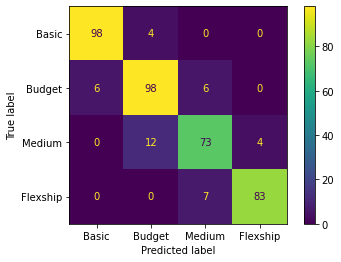

In [ ]:
# plot confusion matrix

plot_confusion_matrix(gbc ,x_test,y_test,display_labels=['Basic','Budget', 'Medium', 'Flexship'])

#### gradient boosting Hyper parameter tuning

In [ ]:
# para_grid values to pass in gridsearchcv

grid_values={'learning_rate':[0.005,0.1,0.5,1,2],
             'min_samples_split':range(15,30)  }

In [ ]:
# Applying GridSearchCV

gbc_tune=GridSearchCV(gbc,param_grid=grid_values,cv=3,verbose=1,scoring='accuracy')

# fit the model

gbc_tune.fit(x_train,y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'learning_rate': [0.005, 0.1, 0.5, 1, 2],
                         'min_samples_split': range(15, 30)},
             scoring='accuracy', verbose=1)

In [ ]:
# Getting best parameters

gbc_tune.best_params_

{'learning_rate': 0.5, 'min_samples_split': 25}

In [ ]:
# aplying best parameter
gbc_best=GradientBoostingClassifier(learning_rate=0.5,random_state=1,min_samples_split=25)
gbc_best.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, min_samples_split=25,
                           random_state=1)

In [ ]:
# check accuracy on traing data

gbc_tr_h=accuracy_score(y_train,y_train_pred)

# check accuracy on test data

gbc_ts_h=accuracy_score(y_test,y_pred)

In [ ]:
# print classificaton report

print("classification report on traing data")
print(classification_report(y_train,y_train_pred))
print('-----------------------------------------------------')
print("classification report on test data")
print(classification_report(y_test,y_pred))

classification report on traing data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       375
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       399

    accuracy                           1.00      1563
   macro avg       1.00      1.00      1.00      1563
weighted avg       1.00      1.00      1.00      1563

-----------------------------------------------------
classification report on test data
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       102
           1       0.86      0.89      0.88       110
           2       0.85      0.82      0.83        89
           3       0.95      0.92      0.94        90

    accuracy                           0.90       391
   macro avg       0.90      0.90      0.90       391
weighted avg       0.90      0.90      0.90       391



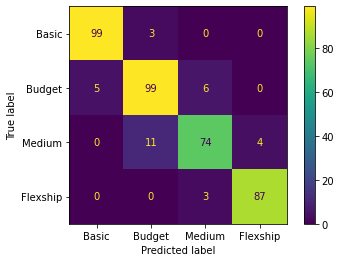

In [ ]:
# plot confusion matrix

plot_confusion_matrix(gbc_best ,x_test,y_test,display_labels=['Basic','Budget', 'Medium', 'Flexship'])

# K Nearest Neighbours From Neighbours KNN

In [ ]:
# import k nearest neighbours from neighbours

from sklearn.neighbors import KNeighborsClassifier

# create object of the knn

knc=KNeighborsClassifier()

#fit the model on training data

knc.fit(x_train,y_train)

# predict on training data

y_train_pred=knc.predict(x_train)

# predict on test data

y_pred=knc.predict(x_test)


In [ ]:
# check accuracy on training data

knc_tr=accuracy_score(y_train,y_train_pred)

In [ ]:
# check accuracy on test data

knc_ts=accuracy_score(y_test,y_pred)

In [ ]:
# print classificaton report

print("classification report on traing data")
print(classification_report(y_train,y_train_pred))
print('-----------------------------------------------------')
print("classification report on test data")
print(classification_report(y_test,y_pred))

classification report on traing data
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       389
           1       0.63      0.66      0.65       375
           2       0.70      0.69      0.69       400
           3       0.91      0.76      0.83       399

    accuracy                           0.75      1563
   macro avg       0.75      0.75      0.75      1563
weighted avg       0.75      0.75      0.75      1563

-----------------------------------------------------
classification report on test data
              precision    recall  f1-score   support

           0       0.66      0.78      0.71       102
           1       0.43      0.43      0.43       110
           2       0.46      0.51      0.48        89
           3       0.84      0.58      0.68        90

    accuracy                           0.57       391
   macro avg       0.60      0.57      0.58       391
weighted avg       0.59      0.57      0.57       391



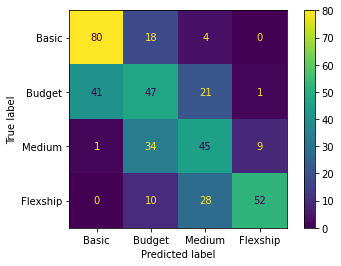

In [ ]:
# plot confusion matrix

plot_confusion_matrix(knc ,x_test,y_test,display_labels=['Basic','Budget', 'Medium', 'Flexship'])

# Comparing Test Accuracy With Traing Accuracy

In [ ]:
list_of_test_accuracy=[lr_ts,dt_ts,dt_ts_h,clsr_tr_h,clsr_ts_h,gbc_ts,gbc_ts_h,xgb_ts,xgb_ts_h,knc_ts,svc_ts,svm_ts_h]

In [ ]:
list_of_training_accuracy=[lr_tr,dt_tr,dt_tr_h,clsr_tr,clsr_tr_h,gbc_tr,gbc_tr_h,xgb_tr,xgb_tr_h,knc_tr,svc_tr,svm_tr_h]

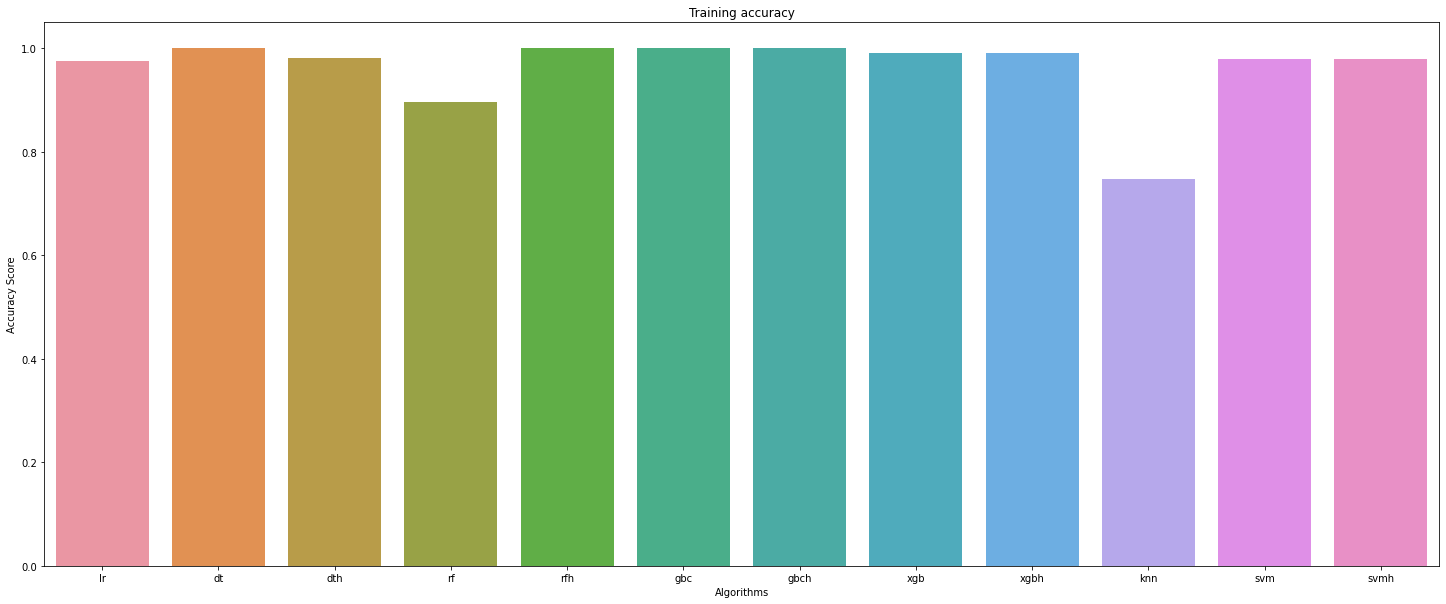

In [ ]:
# plotting the graph of Training accuracy

plt.figure(figsize=(25,10))
sns.barplot(x=['lr','dt','dth','rf','rfh','gbc','gbch','xgb','xgbh','knn','svm','svmh'],y=list_of_training_accuracy)
plt.title("Training accuracy")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()

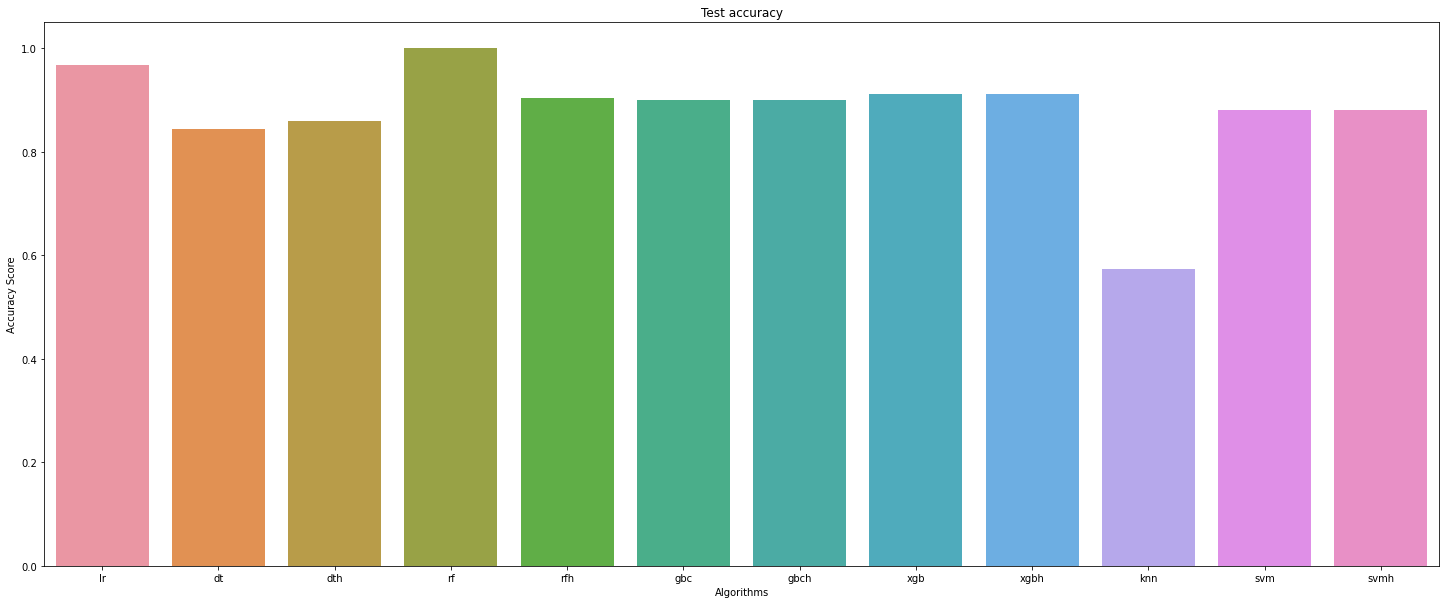

In [ ]:
# ploting graph of Test Accuracy

plt.figure(figsize=(25,10))
sns.barplot(x=['lr','dt','dth','rf','rfh','gbc','gbch','xgb','xgbh','knn','svm','svmh'],y=list_of_test_accuracy)
plt.title("Test accuracy")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()

Text(0.5, 1.0, 'Feature Importance')

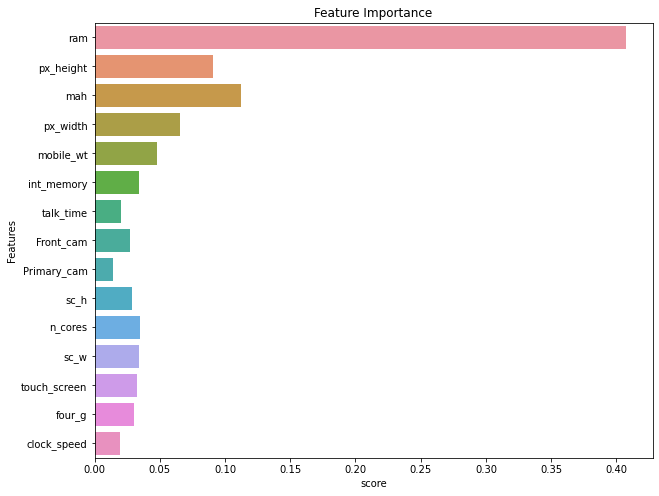

In [ ]:
#Feature importance
features=xgb.feature_importances_

feat_importance=pd.DataFrame({'Features':x.columns,'score':features})
plt.figure(figsize=(10,8))
sns.barplot(x=feat_importance['score'],y=feat_importance['Features'])
plt.title('Feature Importance')

# **Conclusion**

* Decision tree , Random Forest , Gradient Boosting , XGBoost, SVM all are tends to overfit on traing data
* Logistic Regression Gives Very Good Accuracy on Both Test data and Training Data
* RAM is performing the most important role in price
* Followed by RAM battery Capacity play a role in price prediction
* **Logistic** Regression has no feature of feature_importance_ so try to catch the feature importance via xgboost

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***